# Importing Certain Packages

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Reading Data For Analysis

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Airline_Delay_Cause.csv')

# In-depth exploratory data analysis (EDA)

In [4]:
df.shape

(179338, 21)

In [5]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [6]:
df.sample(5)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
30879,2022,8,G4,Allegiant Air,BIL,"Billings, MT: Billings Logan International",17.0,5.0,1.27,1.00,...,0.0,1.44,0.0,0.0,464.0,105.0,20.0,111.0,0.0,228.0
102585,2019,7,OO,SkyWest Airlines Inc.,FAY,"Fayetteville, NC: Fayetteville Regional/Granni...",113.0,17.0,6.14,0.53,...,0.0,6.28,1.0,0.0,877.0,453.0,19.0,132.0,0.0,273.0
97242,2019,9,C5,"Commutair Aka Champlain Enterprises, Inc.",CHS,"Charleston, SC: Charleston AFB/International",63.0,6.0,1.11,0.00,...,0.0,1.73,3.0,0.0,293.0,52.0,0.0,65.0,0.0,176.0
39096,2022,4,OO,SkyWest Airlines Inc.,ELP,"El Paso, TX: El Paso International",179.0,20.0,10.00,0.00,...,0.0,10.00,1.0,0.0,1680.0,449.0,0.0,0.0,0.0,1231.0
152347,2017,2,DL,Delta Air Lines Inc.,BHM,"Birmingham, AL: Birmingham-Shuttlesworth Inter...",230.0,18.0,11.49,0.10,...,0.0,4.06,0.0,1.0,1416.0,1221.0,3.0,51.0,0.0,141.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179338 entries, 0 to 179337
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 179338 non-null  int64  
 1   month                179338 non-null  int64  
 2   carrier              179338 non-null  object 
 3   carrier_name         179338 non-null  object 
 4   airport              179338 non-null  object 
 5   airport_name         179338 non-null  object 
 6   arr_flights          178997 non-null  float64
 7   arr_del15            178747 non-null  float64
 8   carrier_ct           178997 non-null  float64
 9   weather_ct           178997 non-null  float64
 10  nas_ct               178997 non-null  float64
 11  security_ct          178997 non-null  float64
 12  late_aircraft_ct     178997 non-null  float64
 13  arr_cancelled        178997 non-null  float64
 14  arr_diverted         178997 non-null  float64
 15  arr_delay        

In [34]:
df.dropna(inplace=True)

# Verify if any missing values remain
print(df.isnull().sum())
print(f"Shape after dropping NaNs: {df.shape}")

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64
Shape after dropping NaNs: (178747, 21)


1.Distribution of Arrival_delay per flight per airline

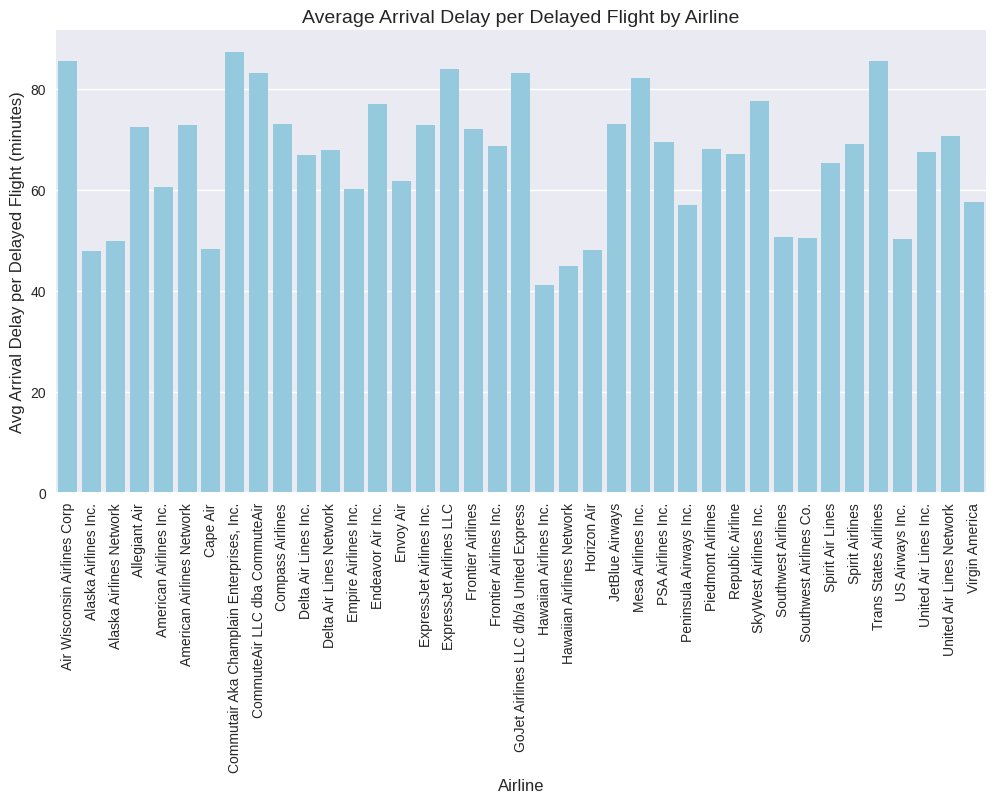

In [35]:
# Compute average arrival delay per delayed flight per airline
avg_delay = df.groupby('carrier_name')[['arr_delay', 'arr_del15']].sum().reset_index()

# Calculate average delay only over delayed flights
avg_delay['avg_arrival_delay_per_delayed_flight'] = avg_delay['arr_delay'] / avg_delay['arr_del15']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='carrier_name', y='avg_arrival_delay_per_delayed_flight', data=avg_delay, color='skyblue')

plt.ylabel('Avg Arrival Delay per Delayed Flight (minutes)', fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.title('Average Arrival Delay per Delayed Flight by Airline', fontsize=14)
plt.xticks(rotation=90)

plt.show()


2. Average Delay Percentage by Airline

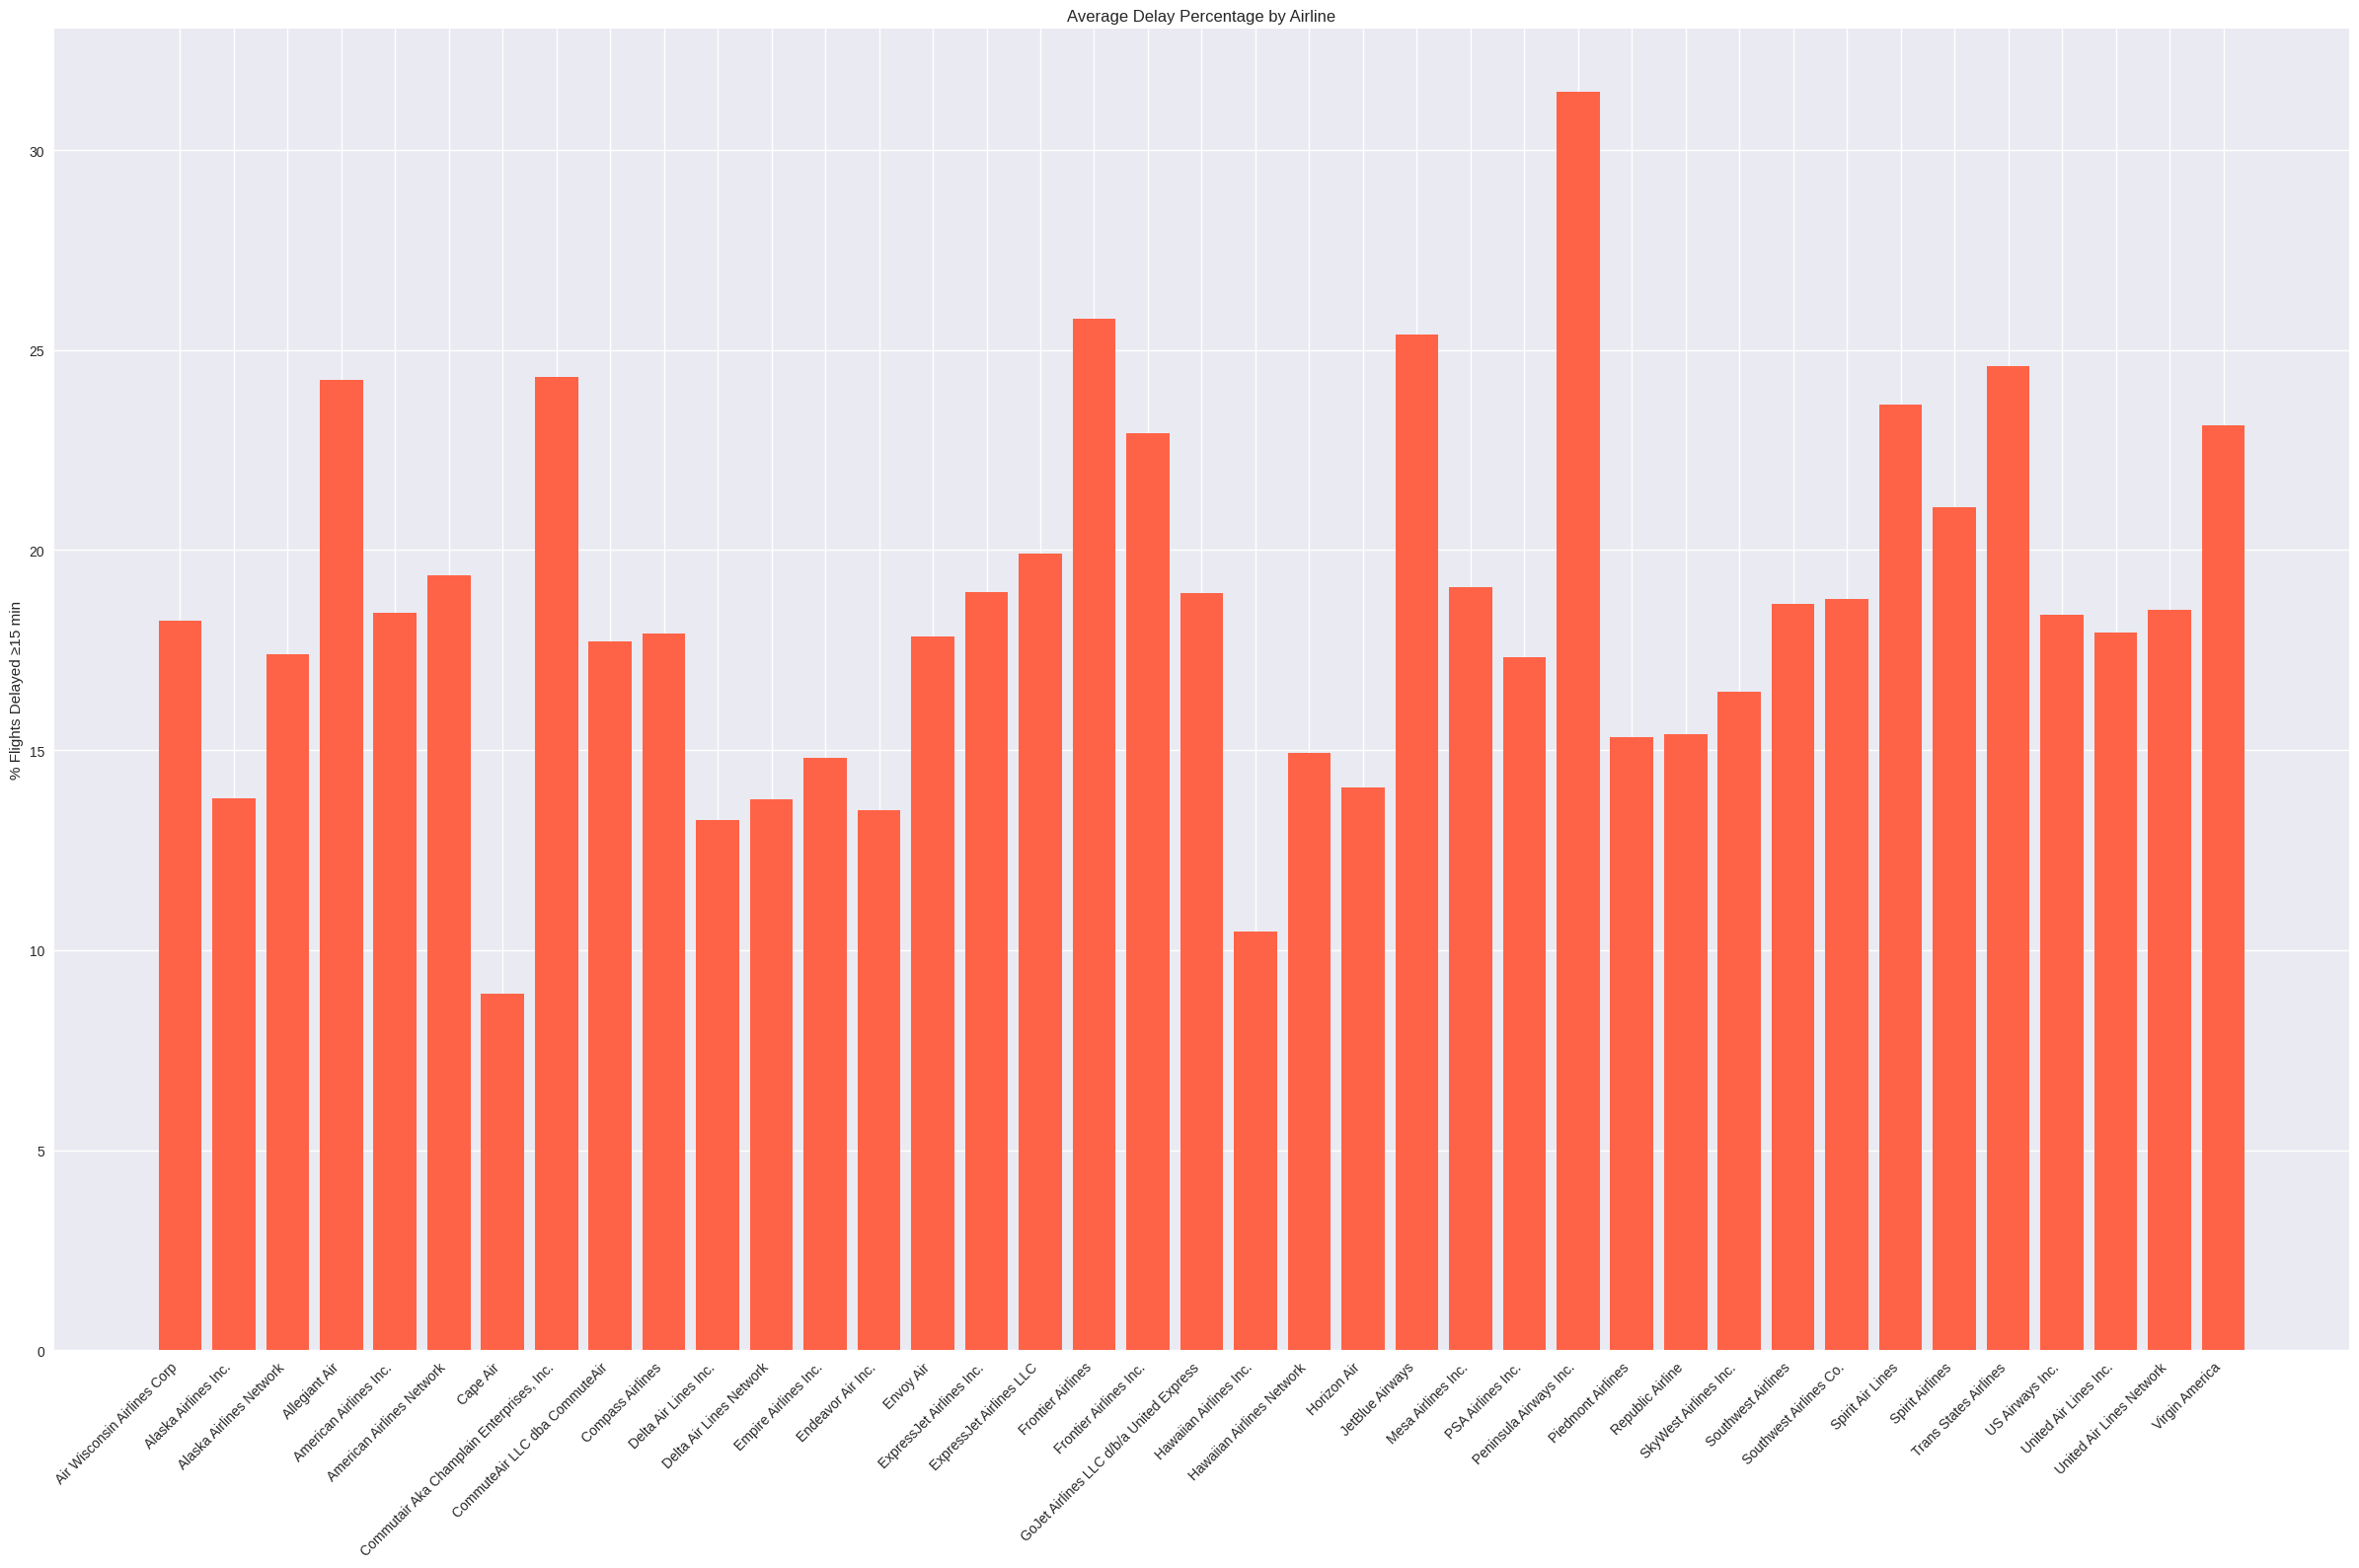

In [36]:
# Calculate overall delay %
overall = df.groupby('carrier_name').agg({
    'arr_del15': 'sum',
    'arr_flights': 'sum'
}).reset_index()

overall['delay_pct'] = (overall['arr_del15'] / overall['arr_flights']) * 100

# overall = overall.sort_values('delay_pct', ascending=False)

plt.figure(figsize=(24,16))
plt.bar(overall['carrier_name'], overall['delay_pct'], color='tomato')
plt.xticks(rotation=45, ha='right')
plt.ylabel('% Flights Delayed ≥15 min')
plt.title('Average Delay Percentage by Airline')
plt.tight_layout()
plt.show()

3. Percentage of flights per airline

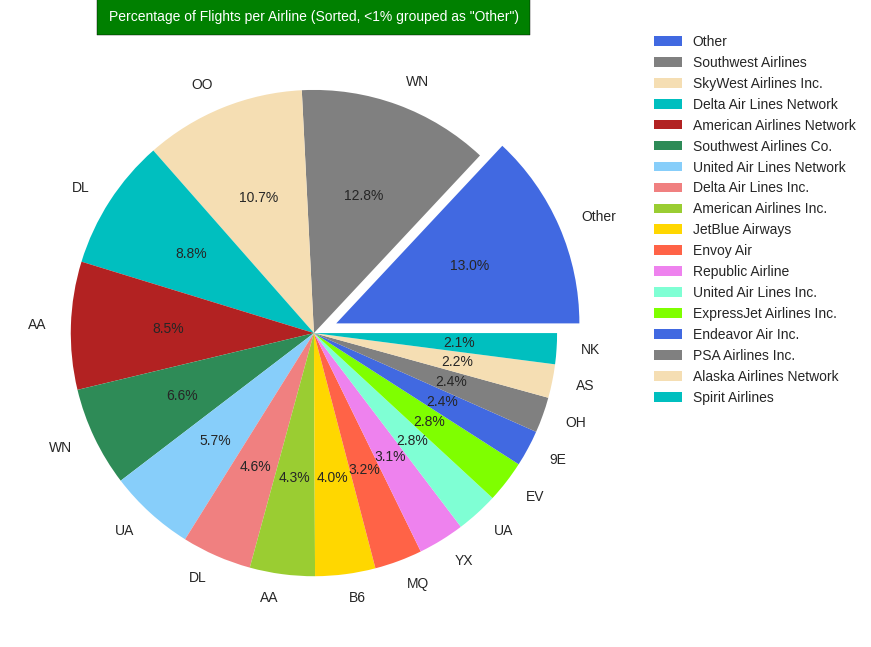

In [38]:
#Grouping by carrier and sum total arrival flights
flight_counts = df.groupby(['carrier', 'carrier_name'])['arr_flights'].sum().reset_index()

#Calculate percentages
total_flights = flight_counts['arr_flights'].sum()
flight_counts['percent'] = (flight_counts['arr_flights'] / total_flights) * 100

#Sort by number of flights (descending)
flight_counts = flight_counts.sort_values(by='arr_flights', ascending=False)

#Separate major and minor carriers
major_carriers = flight_counts[flight_counts['percent'] >= 2.0]
minor_carriers = flight_counts[flight_counts['percent'] < 2.0]

#Create 'Other' row for small airlines
other_row = pd.DataFrame({
    'carrier': ['Other'],
    'carrier_name': ['Other'],
    'arr_flights': [minor_carriers['arr_flights'].sum()],
    'percent': [minor_carriers['percent'].sum()]
})

#Combine and sort again (if needed)
final_counts = pd.concat([major_carriers, other_row], ignore_index=True)
final_counts = final_counts.sort_values(by='arr_flights', ascending=False)

#Prepare data for pie chart
sizes = final_counts['arr_flights'].values
labels = final_counts['carrier']
airline_names = final_counts['carrier_name']

# Define colors (repeating if needed)
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
if len(sizes) > len(colors):
    colors = list(itertools.islice(itertools.cycle(colors), len(sizes)))

# Highlight "Other" slice
explode = [0.1 if label == 'Other' else 0.0 for label in labels]

# =Plot pie chart
plt.figure(figsize=(15, 10))
ax1 = plt.subplot(121, aspect='equal')

patches, texts, autotexts = ax1.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    shadow=False,
    startangle=0
)

# Add legend with full names
plt.legend(airline_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Title
ax1.set_title(
    'Percentage of Flights per Airline (Sorted, <1% grouped as "Other")',
    bbox={'facecolor': 'green', 'pad': 10},
    color='w',
    fontsize=10
)

plt.tight_layout()
plt.show()


4. Impact of Origin Airport on Flight Delays

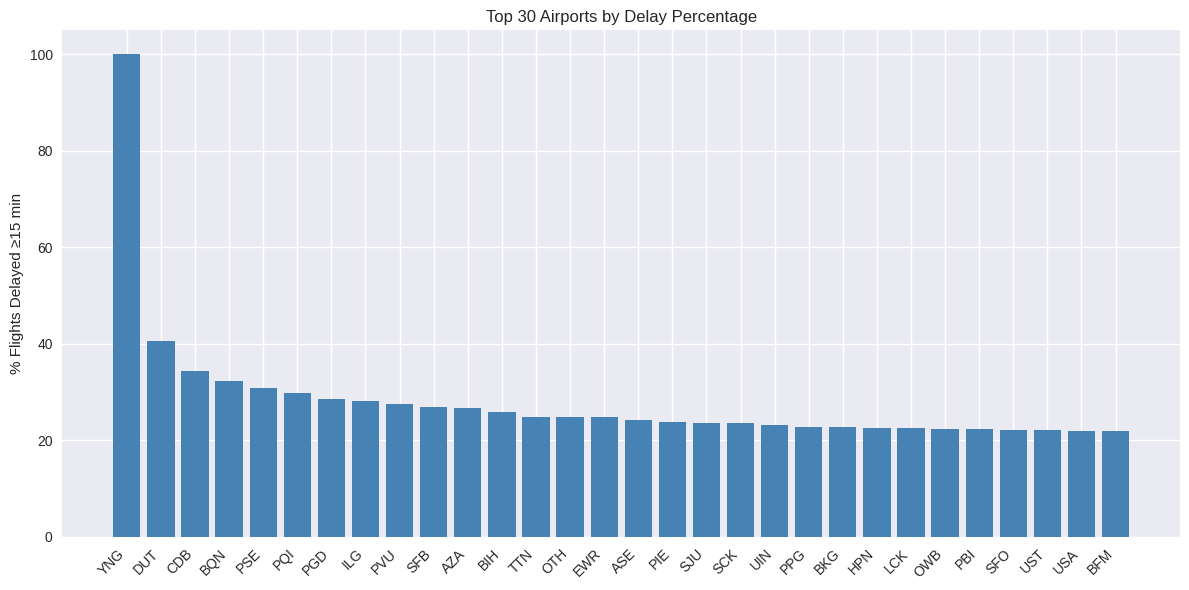

In [12]:
# Group data by airport and aggregate total delayed and total arrival flights
overall_airport = df.groupby('airport').agg({
    'arr_del15': 'sum',       # Total number of flights delayed ≥15 minutes
    'arr_flights': 'sum'      # Total number of arrival flights
}).reset_index()

# Calculate delay percentage for each airport
overall_airport['delay_pct'] = (overall_airport['arr_del15'] / overall_airport['arr_flights']) * 100

# Sort airports by delay percentage in descending order and select top 30
top_airports = overall_airport.sort_values('delay_pct', ascending=False).head(30)

# Plotting the top 30 airports by delay percentage
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(top_airports['airport'], top_airports['delay_pct'], color='steelblue')  # Bar chart
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.ylabel('% Flights Delayed ≥15 min')  # Y-axis label
plt.title('Top 30 Airports by Delay Percentage')  # Chart title
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()  # Display the plot



5.
Contribution of Different Delay Types to Total Arrival Delay

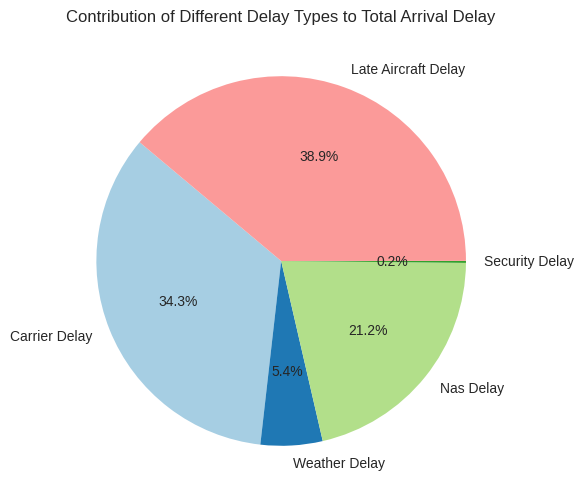

In [13]:
# Sum of each delay type across all flights
delay_types = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

delay_sums = df[delay_types].sum()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(delay_sums, labels=delay_sums.index.str.replace('_', ' ').str.title(),
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Contribution of Different Delay Types to Total Arrival Delay')
plt.show()


6. Delay Type Contributions by Airline

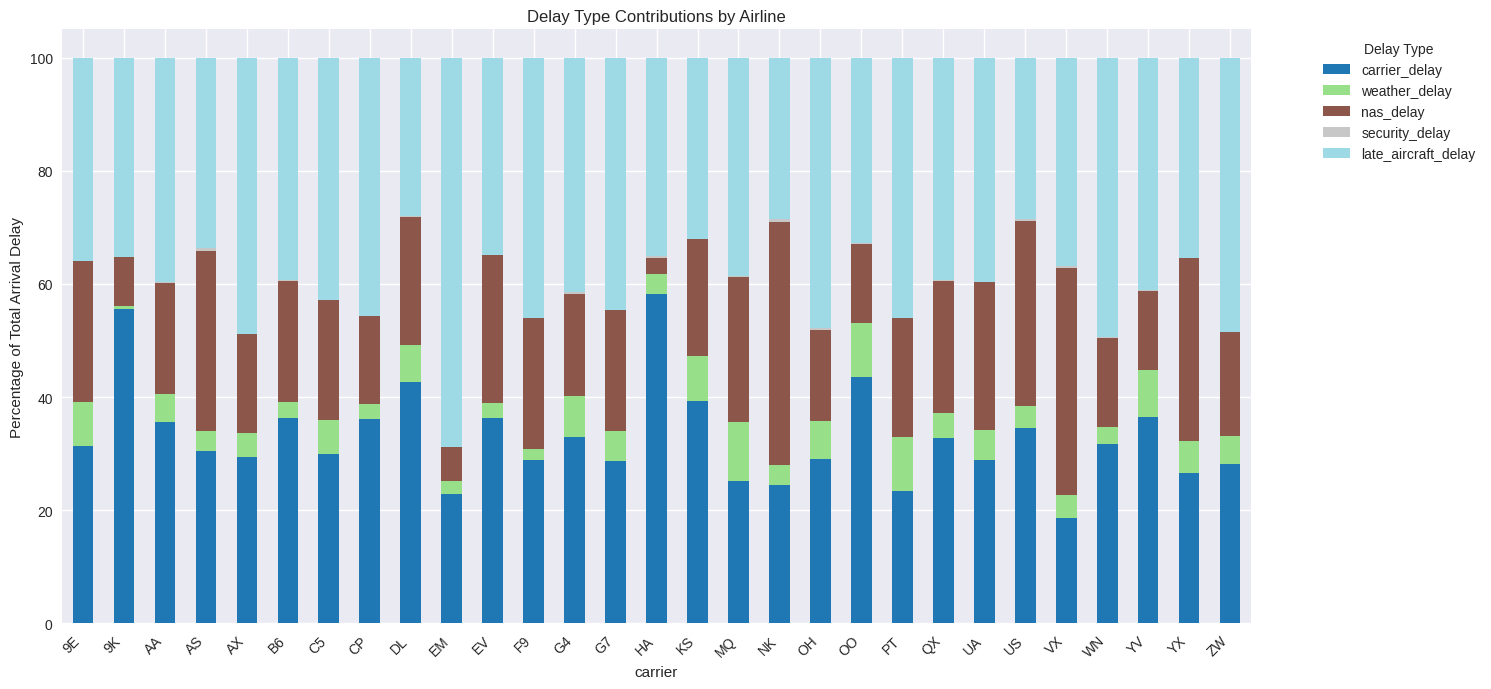

In [14]:
# Group by airline, sum delays
delay_by_carrier = df.groupby('carrier')[delay_types].sum()

# Add total delay column for normalization
delay_by_carrier['total_delay'] = delay_by_carrier.sum(axis=1)

# Calculate percentage contribution of each delay type per airline
delay_pct_by_carrier = delay_by_carrier[delay_types].div(delay_by_carrier['total_delay'], axis=0) * 100

# Plot stacked bar chart
delay_pct_by_carrier.plot(kind='bar', stacked=True, figsize=(15,7), colormap='tab20')
plt.ylabel('Percentage of Total Arrival Delay')
plt.title('Delay Type Contributions by Airline')
plt.legend(title='Delay Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


7. Delay Type Contributions by Top 20 Airports

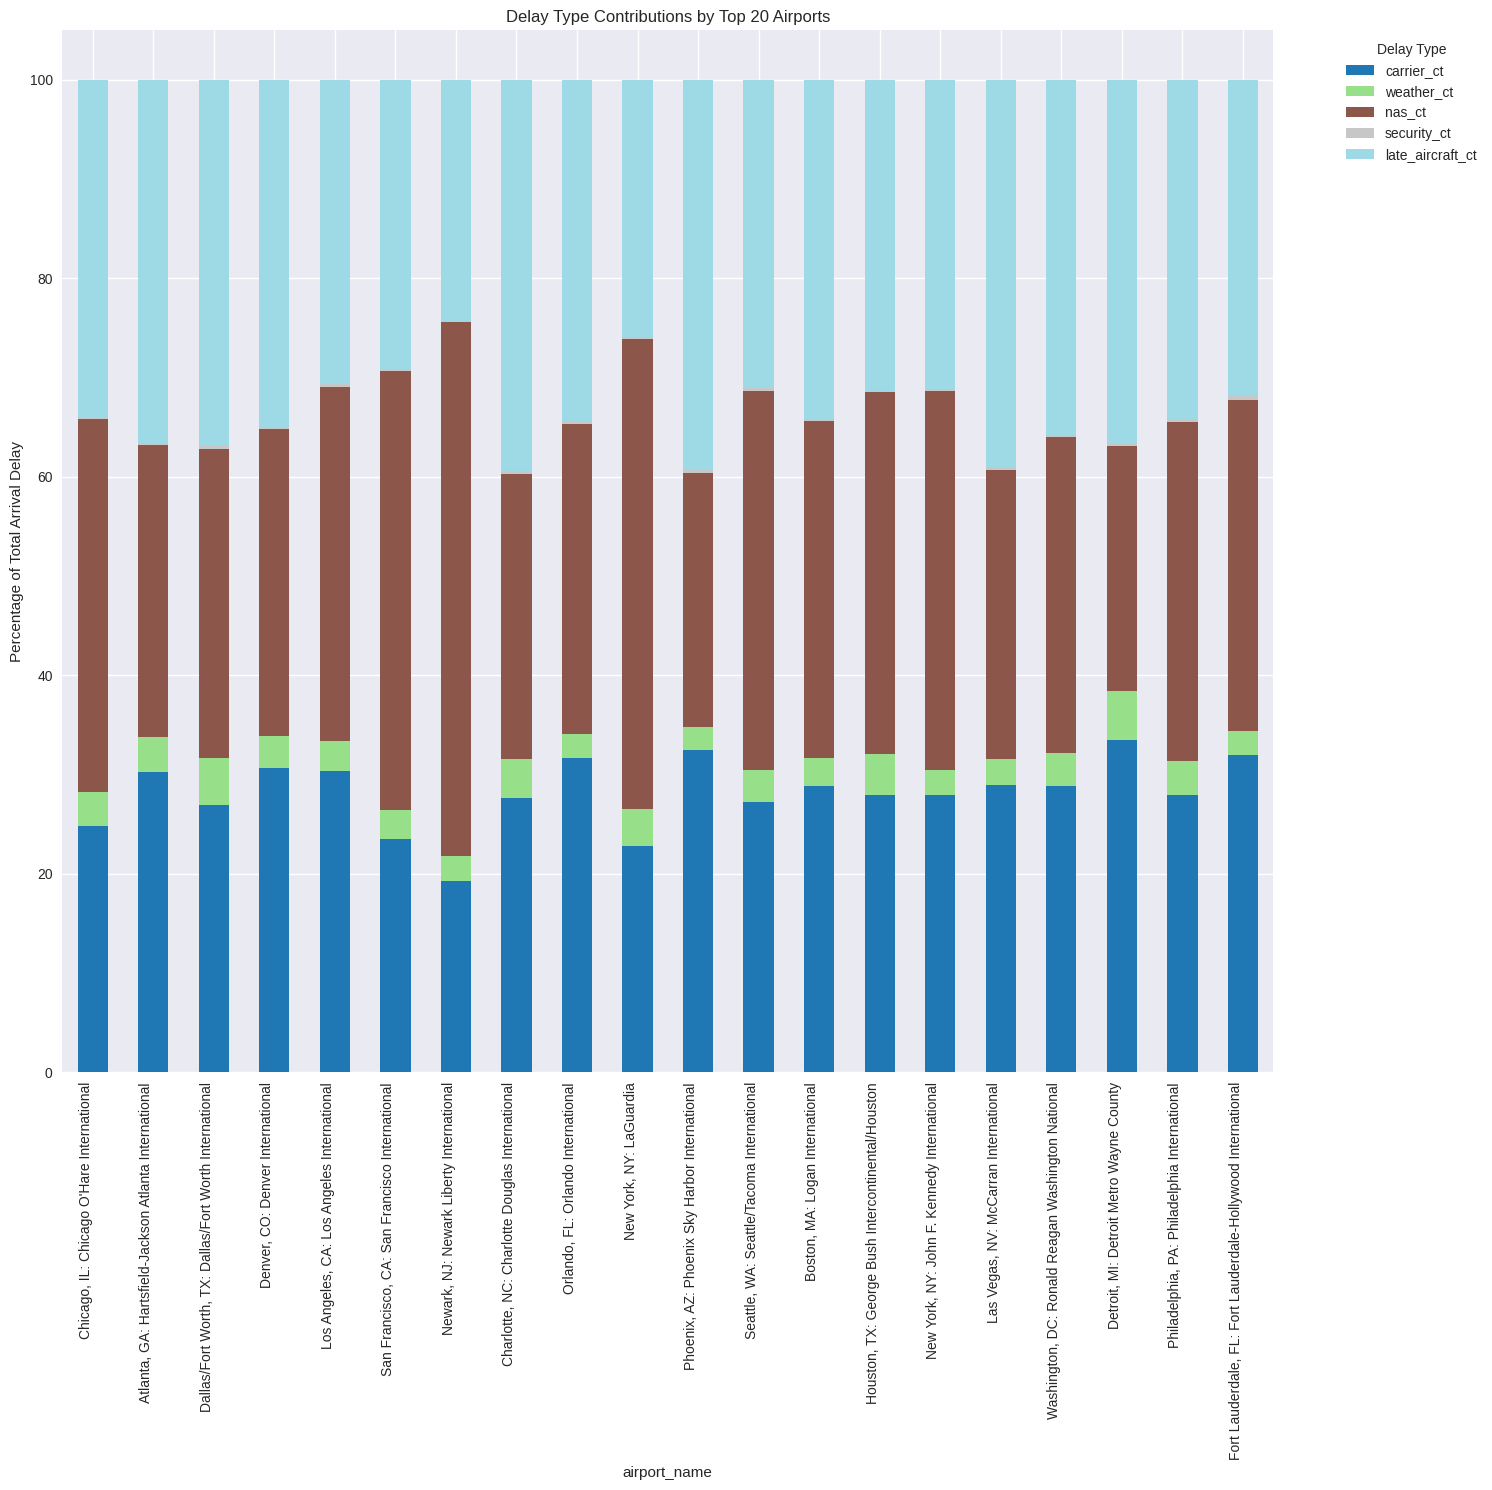

In [15]:
import matplotlib.pyplot as plt

# Define delay types based on your columns
delay_types = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']

# Group by airport_name and sum delay causes
delay_by_airport = df.groupby('airport_name')[delay_types].sum()

# Add total delay (sum of all causes)
delay_by_airport['total_delay'] = delay_by_airport.sum(axis=1)

# Compute percentage of each delay type
delay_pct_by_airport = delay_by_airport[delay_types].div(delay_by_airport['total_delay'], axis=0) * 100

# Sort airports by total delay descending and select top 20
top20_airports = delay_by_airport.sort_values('total_delay', ascending=False).head(20)

# Calculate percentage contribution of each delay type for top 20 airports
delay_pct_top20 = top20_airports[delay_types].div(top20_airports['total_delay'], axis=0) * 100

# Plot
delay_pct_top20.plot(kind='bar', stacked=True, figsize=(15, 15), colormap='tab20')
plt.ylabel('Percentage of Total Arrival Delay')
plt.title('Delay Type Contributions by Top 20 Airports')
plt.legend(title='Delay Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()



8. Airline Delay Metric Visualization

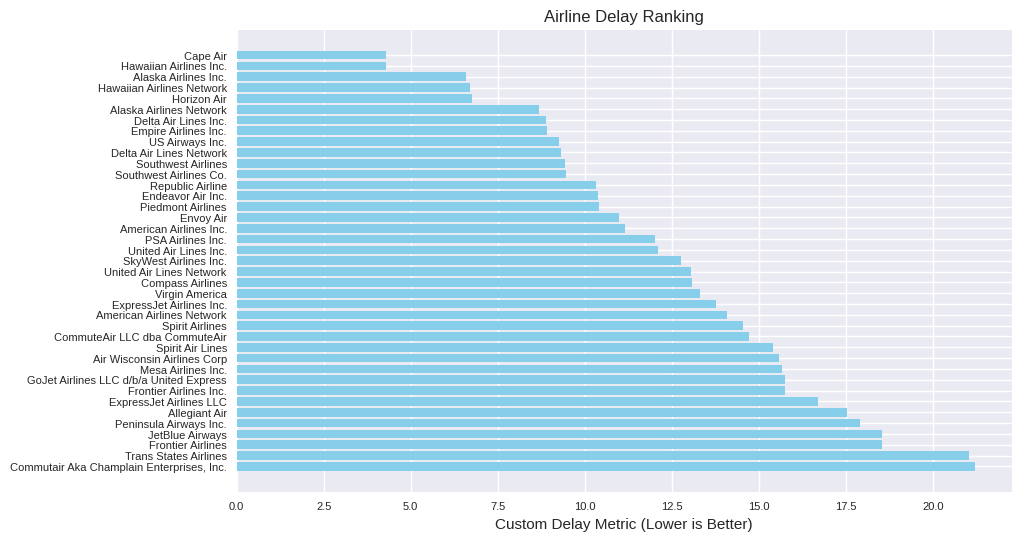

In [16]:
# avg_delay = df.groupby('carrier_name')[['arr_delay', 'arr_del15']].sum().reset_index()
# avg_delay['avg_arrival_delay_per_delayed_flight'] = avg_delay['arr_delay'] / avg_delay['arr_del15']

# Step 1: Get total flights per airline from original df
total_flights = df.groupby('carrier_name')['arr_flights'].sum().reset_index()
total_flights.rename(columns={'arr_flights': 'total_flights'}, inplace=True)

# Step 2: Merge total flights with avg_delay
avg_delay = avg_delay.merge(total_flights, on='carrier_name')

# Step 3: Calculate delay probability
avg_delay['delay_probability'] = avg_delay['arr_del15'] / avg_delay['total_flights']

# Step 4: Calculate custom delay metric
avg_delay['custom_delay_metric'] = avg_delay['delay_probability'] * avg_delay['avg_arrival_delay_per_delayed_flight']

# Step 5: Sort by custom delay metric (lower is better)
avg_delay_sorted = avg_delay.sort_values('custom_delay_metric')

# Step 6: Plot
plt.figure(figsize=(10,6))
plt.barh(avg_delay_sorted['carrier_name'], avg_delay_sorted['custom_delay_metric'], color='skyblue')
plt.xlabel('Custom Delay Metric (Lower is Better)')
plt.title('Airline Delay Ranking')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().invert_yaxis()  # Best airline on top
plt.show()


9. Flight Cancellation Rate by Airline

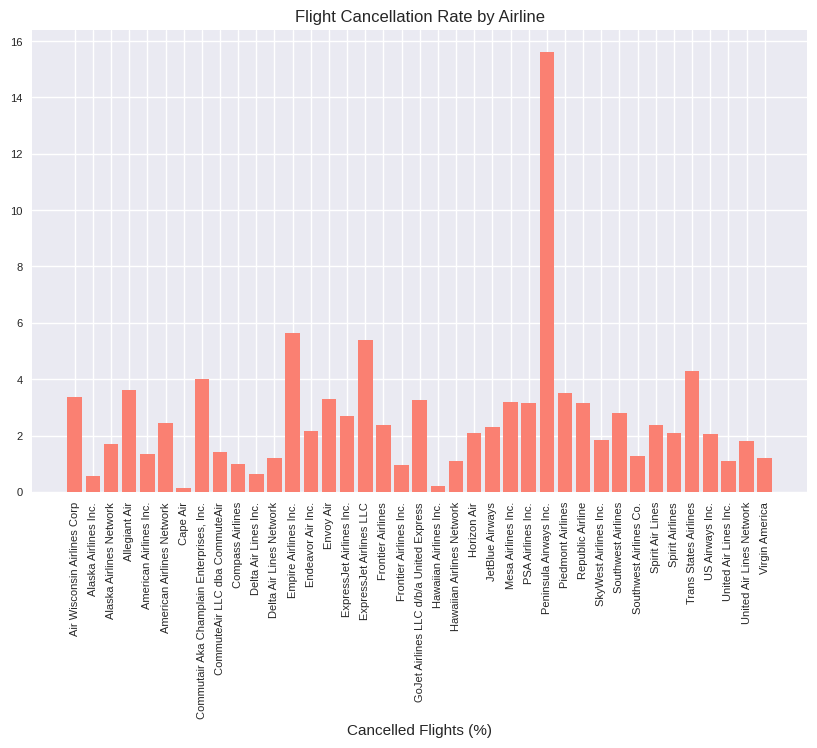

In [17]:
# Group by airline and sum relevant columns
cancel_stats = df.groupby('carrier_name')[['arr_flights', 'arr_cancelled']].sum().reset_index()

# Calculate cancellation rate as percentage
cancel_stats['cancelled_percent'] = (cancel_stats['arr_cancelled'] / cancel_stats['arr_flights']) * 100


plt.figure(figsize=(10,6))
plt.bar(cancel_stats['carrier_name'], cancel_stats['cancelled_percent'], color='salmon')
plt.xlabel('Cancelled Flights (%)')
plt.title('Flight Cancellation Rate by Airline')
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)
plt.show()


10. Flight divertion Rate by Airlines

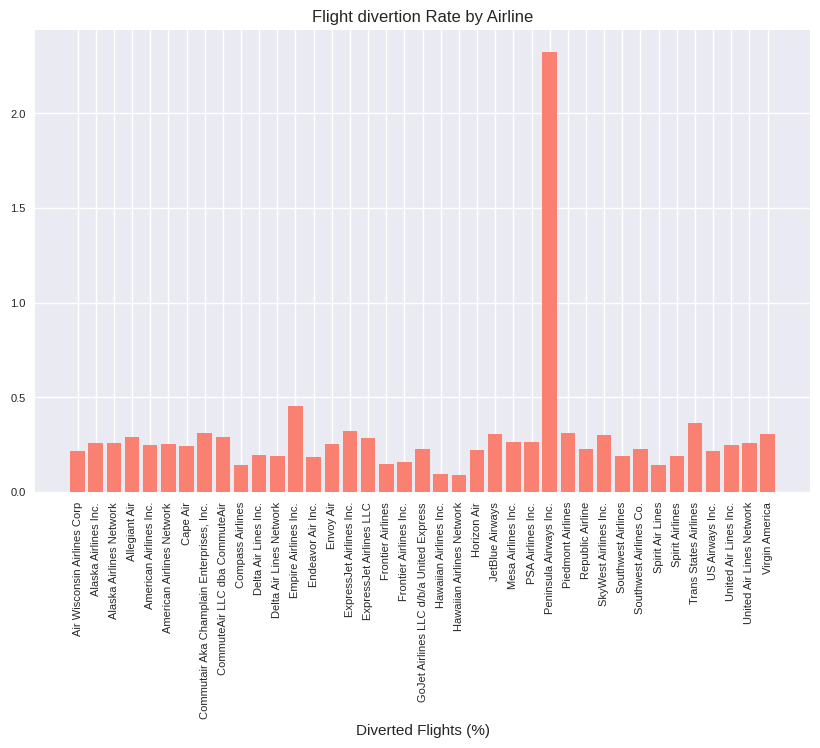

In [18]:
# Group by airline and sum relevant columns
diverted_stats = df.groupby('carrier_name')[['arr_flights', 'arr_diverted']].sum().reset_index()

# Calculate cancellation rate as percentage
diverted_stats['diverted_percent'] = (diverted_stats['arr_diverted'] / diverted_stats['arr_flights']) * 100


plt.figure(figsize=(10,6))
plt.bar(diverted_stats['carrier_name'], diverted_stats['diverted_percent'], color='salmon')
plt.xlabel('Diverted Flights (%)')
plt.title('Flight divertion Rate by Airline')
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)
plt.show()

11. Monthly Arrival Flights

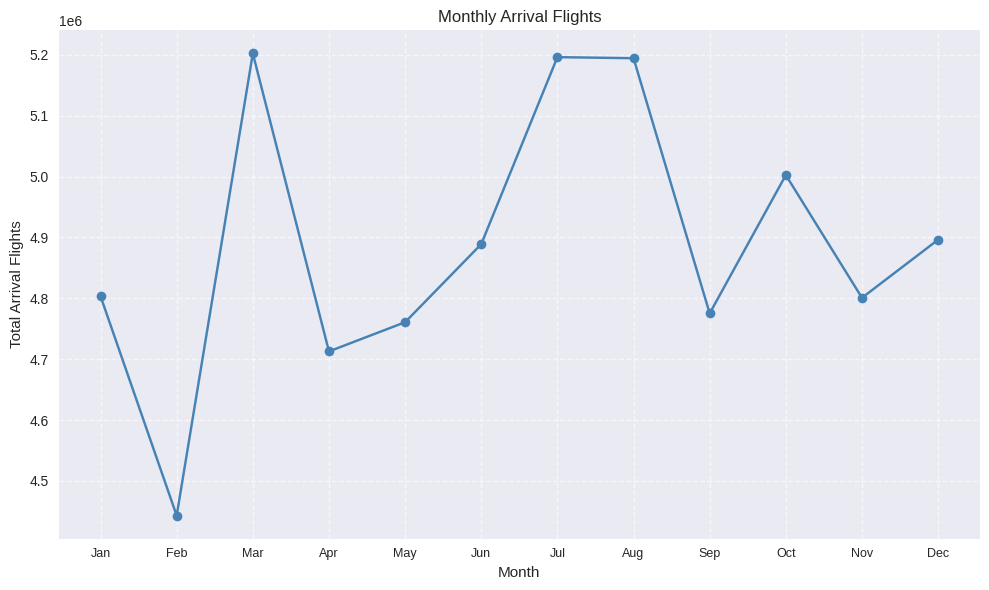

In [19]:
import calendar

# Group by month and sum arrival flights
monthly_flights = df.groupby('month')['arr_flights'].sum().reset_index()

# Optional: Add month names for better x-axis labels
monthly_flights['month_name'] = monthly_flights['month'].apply(lambda x: calendar.month_abbr[x])

# Plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_flights['month'], monthly_flights['arr_flights'], marker='o', linestyle='-', color='steelblue')

# Use month names on x-axis
plt.xticks(ticks=monthly_flights['month'], labels=monthly_flights['month_name'], fontsize=9)

plt.xlabel('Month')
plt.ylabel('Total Arrival Flights')
plt.title('Monthly Arrival Flights')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

12. Yearly Arrival Flights

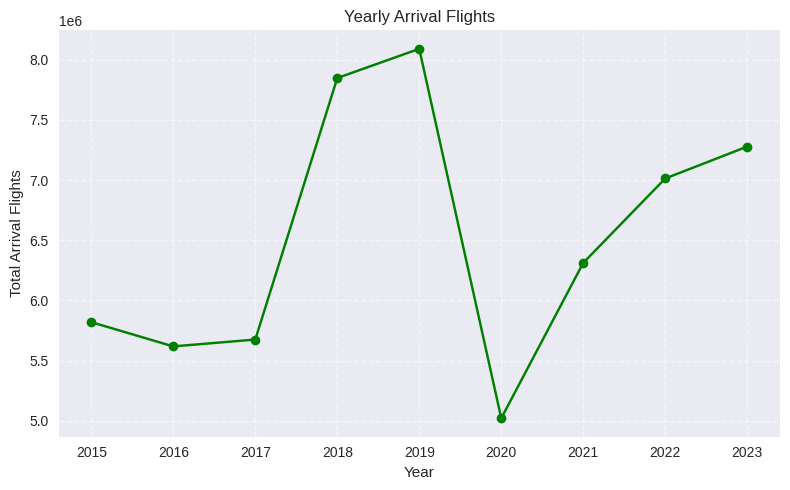

In [20]:
# Group by year and sum arrival flights
yearly_flights = df.groupby('year')['arr_flights'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 5))
plt.plot(yearly_flights['year'], yearly_flights['arr_flights'], marker='o', linestyle='-', color='green')

plt.xlabel('Year')
plt.ylabel('Total Arrival Flights')
plt.title('Yearly Arrival Flights')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(yearly_flights['year'])  # show all year labels
plt.tight_layout()
plt.show()


13. Correlation Between Delay Components

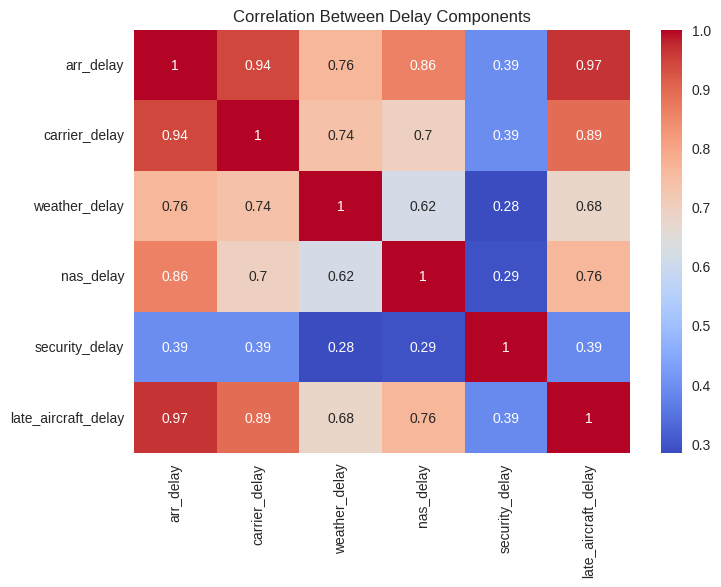

In [21]:
corr_cols = ["arr_delay", "carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]
sns.heatmap(df[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Delay Components")
plt.show()


14. Average Delay per Delayed Flight (by Root Cause)

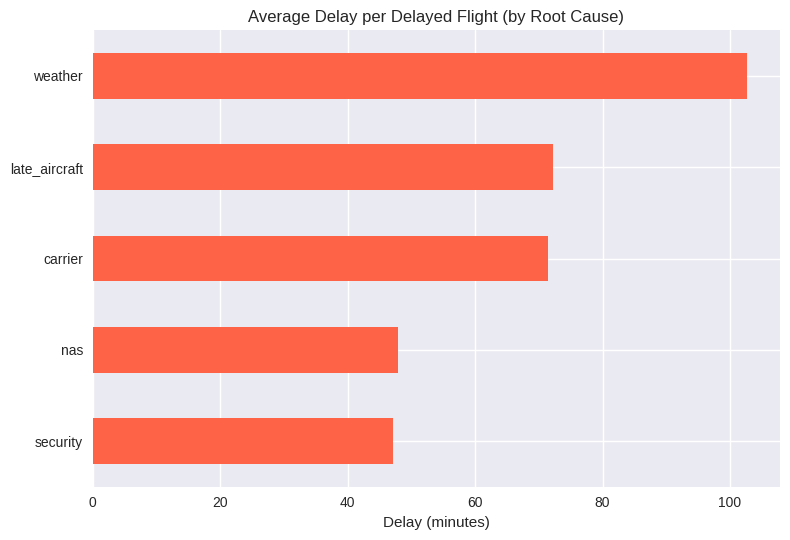

In [22]:
# Define mapping of delay causes to their corresponding delay duration and count columns
delay_causes = {
    "carrier": ("carrier_delay", "carrier_ct"),
    "weather": ("weather_delay", "weather_ct"),
    "nas": ("nas_delay", "nas_ct"),
    "security": ("security_delay", "security_ct"),
    "late_aircraft": ("late_aircraft_delay", "late_aircraft_ct")
}

# Dictionary to store average delay per delayed flight for each cause
avg_delay_per_delayed_flight = {}

# Loop through each delay cause and calculate average delay per delayed flight
for cause, (delay_col, count_col) in delay_causes.items():
    total_delay = df[delay_col].sum()      # Sum of total minutes delayed for this cause
    total_count = df[count_col].sum()      # Total number of flights delayed due to this cause
    avg_delay = total_delay / total_count if total_count != 0 else 0  # Avoid division by zero
    avg_delay_per_delayed_flight[cause] = avg_delay  # Store the result

# Convert dictionary to a sorted Series for plotting
avg_delay_series = pd.Series(avg_delay_per_delayed_flight).sort_values()

# Create a horizontal bar plot
avg_delay_series.plot(kind="barh", color="tomato")
plt.title("Average Delay per Delayed Flight (by Root Cause)")  # Plot title
plt.xlabel("Delay (minutes)")  # X-axis label
plt.tight_layout()
plt.show()


15. Contribution of Different Delay Types to Total Arrival Delay

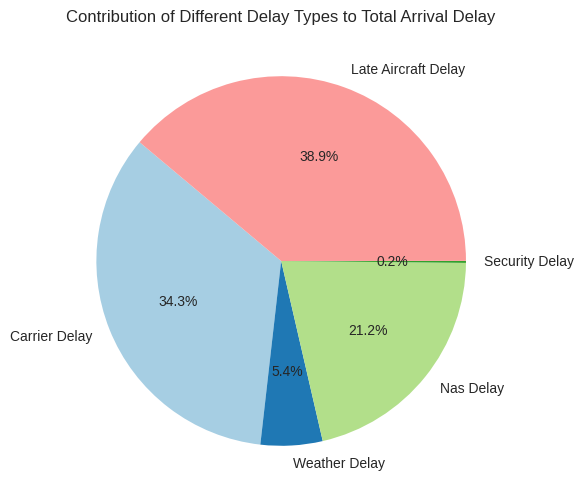

In [23]:
# Sum of each delay type across all flights
delay_types = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

delay_sums = df[delay_types].sum()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(delay_sums, labels=delay_sums.index.str.replace('_', ' ').str.title(),
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Contribution of Different Delay Types to Total Arrival Delay')
plt.show()


16. Monthly Total Delays Over Time

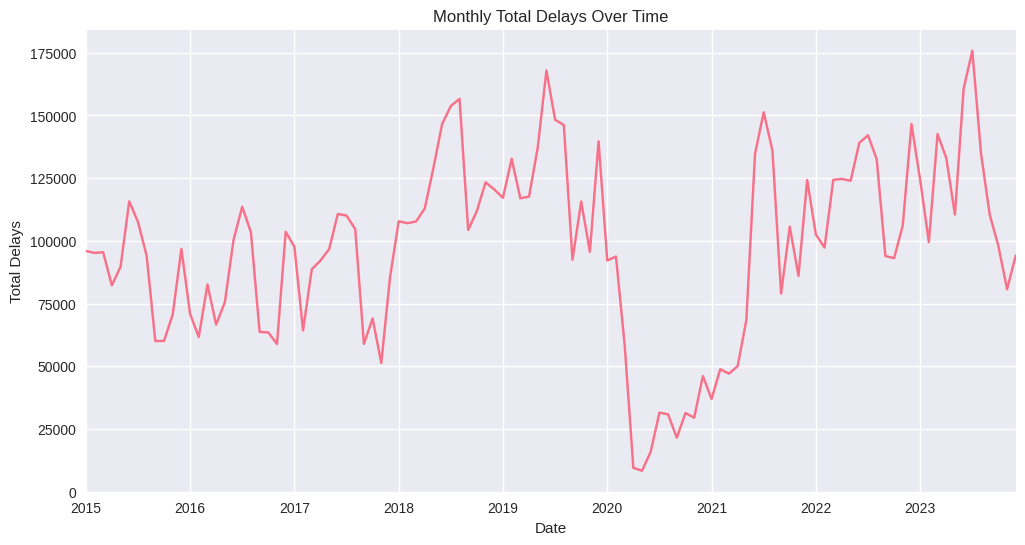

In [24]:
df['date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))
monthly_delays = df.groupby('date')['arr_del15'].sum()
plt.figure(figsize=(12, 6))
monthly_delays.plot(kind='line')
plt.title('Monthly Total Delays Over Time')
plt.xlabel('Date')
plt.ylabel('Total Delays')
plt.show()

17. Correlation Matrix of Delay Metrics

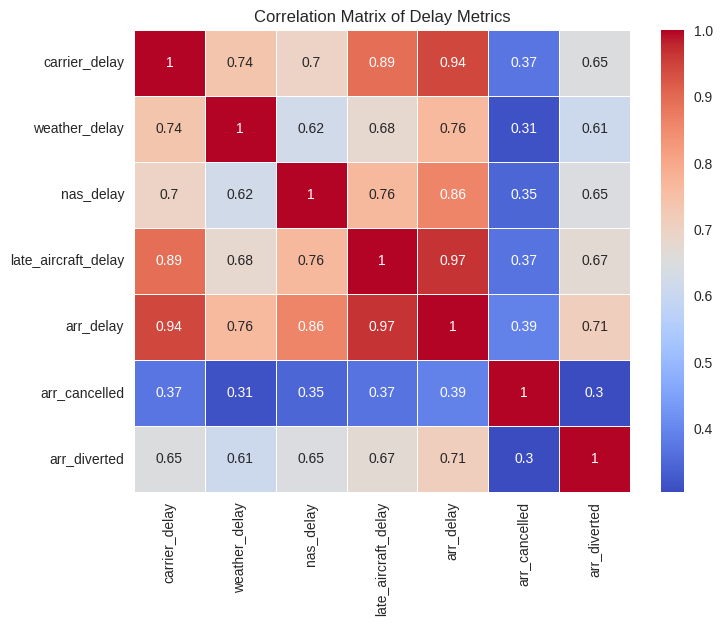

In [25]:
delay_reasons = ['carrier_delay', 'weather_delay', 'nas_delay', 'late_aircraft_delay']
plt.figure(figsize=(8,6))
corr_matrix = df[delay_reasons + ['arr_delay', 'arr_cancelled', 'arr_diverted']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Delay Metrics')
plt.show()

18. Number of Flights Delayed by 15 Minutes or More

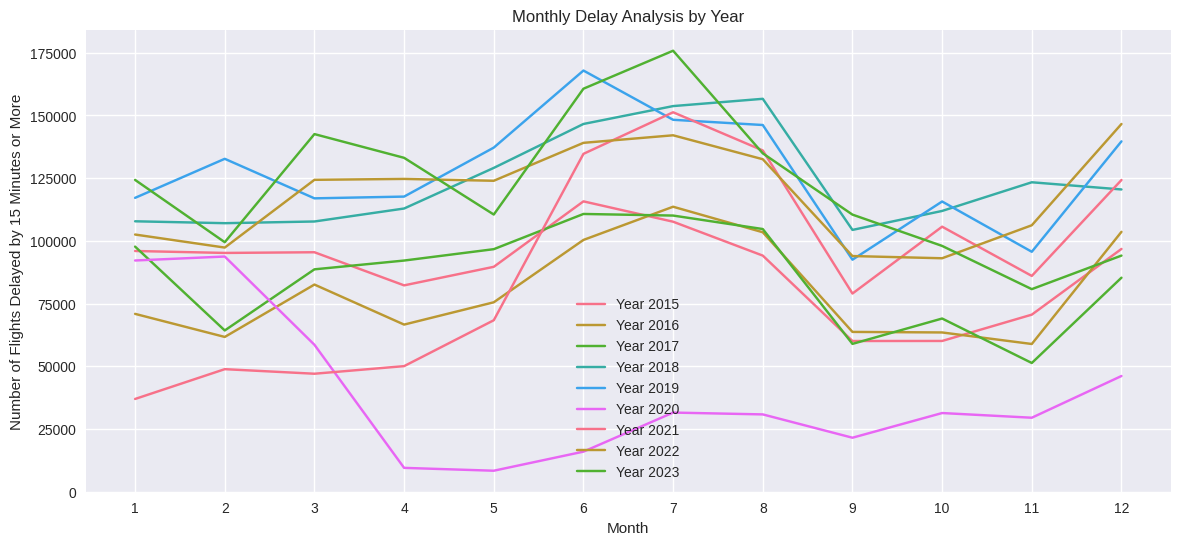

In [26]:
monthly_delays = df.groupby(['year', 'month'])['arr_del15'].sum().reset_index()

plt.figure(figsize=(14, 6))
for year in sorted(monthly_delays['year'].unique()):
    monthly_data = monthly_delays[monthly_delays['year'] == year]
    plt.plot(monthly_data['month'], monthly_data['arr_del15'], label=f'Year {year}')

plt.title('Monthly Delay Analysis by Year')
plt.xlabel('Month')
plt.ylabel('Number of Flights Delayed by 15 Minutes or More')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()


# Reading Data for prediction


### Dataset Selection

In this project, I have used a different dataset from the one originally provided. The reason for this choice is to enhance the accuracy and relevance of the flight delay prediction model by incorporating additional features such as weather conditions and specific flight-related data.

The selected dataset includes:
- Detailed weather information (e.g., temperature, visibility, wind speed, precipitation)
- Specific flight data (e.g., airline, origin and destination airports, scheduled and actual departure/arrival times)
- Delay indicators (e.g., departure delay, arrival delay, delay causes)

These features are highly relevant in real-world scenarios where weather and operational details play a significant role in flight delays. By using a dataset that captures these aspects, the model is better equipped to learn complex patterns and provide more accurate predictions.

This decision was made with the goal of building a more realistic and effective machine learning model for predicting flight delays.


In [27]:
df = pd.read_csv('/content/drive/MyDrive/datasets/flight_prediction_dataset.csv')

# Data Preprocessing

In [ ]:
df.shape

(28820, 23)

In [ ]:
df.dropna(inplace=True)
df.shape

(28818, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28818 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28818 non-null  int64  
 1   DAY_OF_MONTH       28818 non-null  int64  
 2   DAY_OF_WEEK        28818 non-null  int64  
 3   OP_UNIQUE_CARRIER  28818 non-null  object 
 4   TAIL_NUM           28818 non-null  object 
 5   DEST               28818 non-null  object 
 6   DEP_DELAY          28818 non-null  int64  
 7   CRS_ELAPSED_TIME   28818 non-null  int64  
 8   DISTANCE           28818 non-null  int64  
 9   CRS_DEP_M          28818 non-null  int64  
 10  DEP_TIME_M         28818 non-null  int64  
 11  CRS_ARR_M          28818 non-null  int64  
 12  Temperature        28818 non-null  int64  
 13  Dew Point          28818 non-null  object 
 14  Humidity           28818 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         28818 no

In [ ]:
df.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'TAIL_NUM',
       'DEST', 'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M',
       'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew Point', 'Humidity',
       'Wind', 'Wind Speed', 'Wind Gust', 'Pressure', 'Condition', 'sch_dep',
       'sch_arr', 'TAXI_OUT'],
      dtype='object')

In [ ]:
# Drop 'TAIL_NUM' as it is an aircraft identifier and may not have predictive value
# or could lead to data leakage if certain planes are always delayed.
df = df.drop('TAIL_NUM', axis=1)

# Drop 'DEP_TIME_M' (actual departure time in minutes since midnight),
# as this is a post-scheduled feature that likely occurs after prediction time —
# 'CRS_DEP_M' (scheduled departure) is more appropriate for modeling.
df = df.drop('DEP_TIME_M', axis=1)

# Drop 'TAXI_OUT' since it's only known after the plane starts moving,
# making it unavailable at the time of prediction and potentially leaking future information.
df = df.drop('TAXI_OUT', axis=1)


In [ ]:
# Convert 'Dew Point' column to numeric values:
# - First, ensure all values are strings and remove leading/trailing whitespace with .str.strip()
# - Then, convert to numeric using pd.to_numeric
# - Set errors='coerce' to turn invalid entries (like text or symbols) into NaN, which can be handled later
df['Dew Point'] = pd.to_numeric(df['Dew Point'].astype(str).str.strip(), errors='coerce')

In [ ]:
# Print the names of all columns in the DataFrame that have the 'object' data type.
# and may require encoding or cleaning before being used in a machine learning model.
print(df.select_dtypes(include='object').columns)

Index(['OP_UNIQUE_CARRIER', 'DEST', 'Wind', 'Condition'], dtype='object')


In [ ]:
def remove_outliers_from_target(df, target_col):
    """
    Removes outliers from a specified target column in a DataFrame using the IQR (Interquartile Range) method.

    Motive:
    --------
    This function is designed to clean the dataset by removing extreme values (outliers)
    from the target column. Outliers can negatively impact model training by skewing
    the learning process, especially in regression tasks. By filtering them out,
    the model can generalize better and produce more reliable predictions.
    """

    # Calculate the first quartile (25th percentile) of the target column
    Q1 = df[target_col].quantile(0.25)

    # Calculate the third quartile (75th percentile) of the target column
    Q3 = df[target_col].quantile(0.75)

    # Compute the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower bound for outliers
    lower_bound = Q1 - 1.5 * IQR

    # Define the upper bound for outliers
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to include only rows where the target value is within the bounds
    df_filtered = df[(df[target_col] >= lower_bound) & (df[target_col] <= upper_bound)].reset_index(drop=True)

    # Return the filtered DataFrame with outliers removed
    return df_filtered



In [ ]:
# List of numerical columns from which to remove outliers using the IQR method
remove_outliers_from_cols = [
    'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M', 'CRS_ARR_M',
    'Temperature', 'Dew Point', 'Humidity', 'Wind Speed',
    'Wind Gust', 'Pressure', 'sch_dep', 'sch_arr'
]

# Iterate through each column in the list
for col in remove_outliers_from_cols:
    # Apply the outlier removal function to the DataFrame for the current column
    # This removes rows where the column value falls outside the IQR bounds
    df = remove_outliers_from_target(df, col)


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTH,22899.0,8.015066,4.958874,1.00,1.00,11.00,12.00,12.00
DAY_OF_MONTH,22899.0,16.398926,8.828593,1.00,9.00,17.00,24.00,31.00
DAY_OF_WEEK,22899.0,3.863793,1.978222,1.00,2.00,4.00,6.00,7.00
DEP_DELAY,22899.0,5.293594,34.821421,-20.00,-6.00,-3.00,1.00,1148.00
CRS_ELAPSED_TIME,22899.0,224.531508,116.961033,57.00,124.00,189.00,365.00,427.00
DISTANCE,22899.0,1258.891829,865.806747,94.00,427.00,1029.00,2248.00,2586.00
CRS_DEP_M,22899.0,833.726233,301.265078,301.00,540.00,869.00,1100.00,1439.00
CRS_ARR_M,22899.0,909.844273,349.581898,1.00,664.00,916.00,1204.00,1439.00
Temperature,22899.0,41.743963,7.776234,21.00,36.00,42.00,48.00,63.00
Dew Point,22899.0,31.538233,11.701586,-1.00,25.00,32.00,39.00,59.00


In [ ]:
# Count the number of rows in the DataFrame where the departure delay ('DEP_DELAY') is greater than 500 minutes.
# Motive: Helps identify extreme outliers or rare cases of very long delays, which might distort the model.
df[df['DEP_DELAY'] > 500].shape[0]

16

In [ ]:
# Remove rows where the departure delay ('DEP_DELAY') is greater than 500 minutes,
# as these are considered extreme outliers that may skew the model's learning.
# Reset the index after filtering to keep the DataFrame tidy.
df = df[df['DEP_DELAY'] <= 500].reset_index(drop=True)

In [ ]:
# Separate the features (independent variables) and the target (dependent variable)
# 'x' will contain all columns except 'DEP_DELAY', which are used as input features for the model
x = df.drop('DEP_DELAY', axis=1)

# 'y' will contain only the 'DEP_DELAY' column, which is the target variable to be predicted
y = df['DEP_DELAY']

In [ ]:
y.describe()

,DEP_DELAY
count,22883.000000
mean,4.824717
std,29.595572
min,-20.000000
25%,-6.000000
50%,-3.000000
75%,1.000000
max,468.000000


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22883 entries, 0 to 22882
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              22883 non-null  int64  
 1   DAY_OF_MONTH       22883 non-null  int64  
 2   DAY_OF_WEEK        22883 non-null  int64  
 3   OP_UNIQUE_CARRIER  22883 non-null  object 
 4   DEST               22883 non-null  object 
 5   CRS_ELAPSED_TIME   22883 non-null  int64  
 6   DISTANCE           22883 non-null  int64  
 7   CRS_DEP_M          22883 non-null  int64  
 8   CRS_ARR_M          22883 non-null  int64  
 9   Temperature        22883 non-null  int64  
 10  Dew Point          22883 non-null  int64  
 11  Humidity           22883 non-null  int64  
 12  Wind               22883 non-null  object 
 13  Wind Speed         22883 non-null  int64  
 14  Wind Gust          22883 non-null  int64  
 15  Pressure           22883 non-null  float64
 16  Condition          228

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Specify the list of categorical columns that need to be converted to numeric values
categorical_cols = ['OP_UNIQUE_CARRIER', 'DEST', 'Wind', 'Condition']

# Iterate over each categorical column
for col in categorical_cols:
    le = LabelEncoder()  # Initialize a new LabelEncoder instance

    # Convert the column to string type (in case it's not),
    # then apply label encoding to convert categories into integers
    x[col] = le.fit_transform(x[col].astype(str))


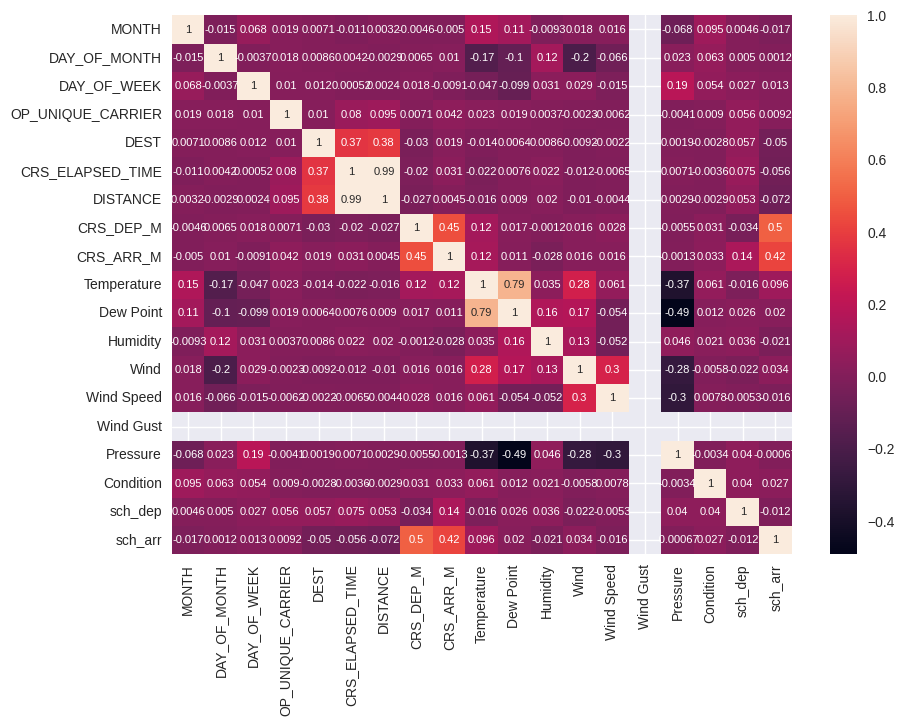

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better readability of the heatmap
plt.figure(figsize=(10, 7))

# Generate a heatmap to visualize the correlation matrix of the features in 'x'
# annot=True displays the correlation values in each cell
# annot_kws={'size': 8} sets the font size of the annotations
sns.heatmap(x.corr(), annot=True, annot_kws={'size': 8})

# Display the heatmap plot
plt.show()


In [ ]:
# Drop 'CRS_ELAPSED_TIME' column from the feature set
# Motive: Possibly removed due to high correlation with 'distance' column
x = x.drop('CRS_ELAPSED_TIME', axis=1)

# Drop 'Wind Gust' column from the feature set
# Motive: Due to high number of missing values, low correlation with the target
x = x.drop('Wind Gust', axis=1)


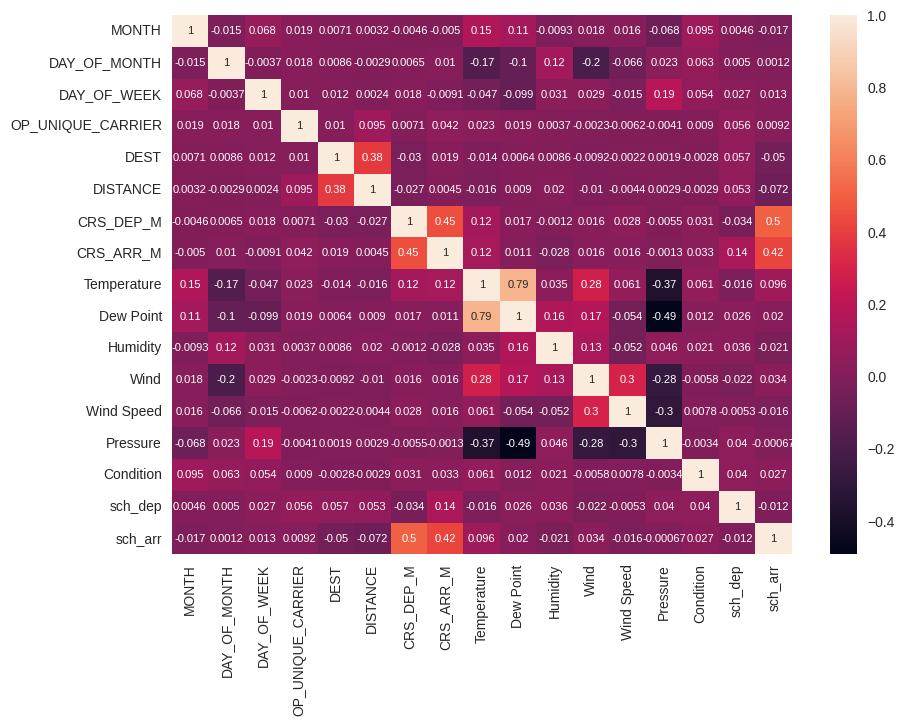

In [ ]:
# Set the figure size for better visibility of the heatmap
plt.figure(figsize=(10, 7))

# Generate a heatmap to visualize the correlation matrix of the features in 'x'
# - x.corr() computes pairwise Pearson correlation coefficients between numerical columns
# - annot=True adds the numeric correlation values inside the heatmap cells
# - annot_kws={'size': 8} sets the font size of the annotations for readability
sns.heatmap(x.corr(), annot=True, annot_kws={'size': 8})

# Display the heatmap
plt.show()

In [ ]:
x.shape

(22883, 17)

In [ ]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTH,22883.0,8.015295,4.958699,1.00,1.00,11.00,12.00,12.00
DAY_OF_MONTH,22883.0,16.399205,8.830663,1.00,9.00,17.00,24.00,31.00
DAY_OF_WEEK,22883.0,3.864048,1.978404,1.00,2.00,4.00,6.00,7.00
OP_UNIQUE_CARRIER,22883.0,2.742866,1.708156,0.00,1.00,3.00,4.00,7.00
DEST,22883.0,30.412796,18.364689,0.00,15.00,27.00,47.00,63.00
DISTANCE,22883.0,1259.156142,865.814455,94.00,427.00,1029.00,2248.00,2586.00
CRS_DEP_M,22883.0,833.568064,301.241286,301.00,540.00,869.00,1100.00,1439.00
CRS_ARR_M,22883.0,909.697548,349.552576,1.00,664.00,915.00,1204.00,1439.00
Temperature,22883.0,41.748416,7.774138,21.00,36.00,42.00,48.00,63.00
Dew Point,22883.0,31.540882,11.700163,-1.00,25.00,32.00,39.00,59.00


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler, which standardizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Fit the scaler on the features in 'x' and transform them
# This scales each feature to have mean = 0 and standard deviation = 1
X_scaled = scaler.fit_transform(x)

# Optional: Convert the scaled NumPy array back into a DataFrame to preserve the original column names
import pandas as pd
X_scaled = pd.DataFrame(X_scaled, columns=x.columns)


In [ ]:
from sklearn.model_selection import train_test_split

# First, split into train+temp and test (e.g. 80% train+val, 20% test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Then split train+val into train and validation (e.g. 75% of temp is train, 25% is val)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Final shapes
print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (13729, 17)
Validation shape: (4577, 17)
Test shape: (4577, 17)


# Regression

In [ ]:
# Imports
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#  Motive:
# To train and evaluate multiple regression models on the same dataset,
# compare their performance using standard metrics (RMSE, MAE, R²),
# and determine which model is most suitable for predicting flight delays.

# Define a dictionary of regression models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'LightGBM': LGBMRegressor(random_state=42),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Support Vector Regressor': SVR()
}

# Dictionary to store results for each model
model_results = {}

# Loop through each model
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model using training data
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)       # Mean Squared Error
    rmse = mse ** 0.5                               # Root Mean Squared Error
    mae = mean_absolute_error(y_test, y_pred)       # Mean Absolute Error
    r2 = r2_score(y_test, y_pred)                   # R-squared score

    # Store model performance metrics and predictions
    model_results[name] = {
        'model': model,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'y_pred': y_pred
    }

    #  Print performance summary for the current model
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R²: {r2:.4f}")

# Create a summary DataFrame for comparison
results_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'RMSE': [results['RMSE'] for results in model_results.values()],
    'MAE': [results['MAE'] for results in model_results.values()],
    'R2': [results['R2'] for results in model_results.values()]
})

# Display the final model comparison summary
print("\n" + "="*50)
print("MODEL COMPARISON SUMMARY")
print("="*50)
print(results_df.round(4))



Training Linear Regression...
RMSE: 29.65
MAE: 14.31
R²: 0.0261

Training Random Forest...
RMSE: 25.08
MAE: 11.88
R²: 0.3031

Training XGBoost...
RMSE: 19.40
MAE: 9.31
R²: 0.5833

Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1147
[LightGBM] [Info] Number of data points in the train set: 13729, number of used features: 17
[LightGBM] [Info] Start training from score 4.635006
RMSE: 21.59
MAE: 10.02
R²: 0.4838

Training ElasticNet...
RMSE: 29.67
MAE: 14.30
R²: 0.0246

Training Support Vector Regressor...
RMSE: 30.87
MAE: 11.28
R²: -0.0555

MODEL COMPARISON SUMMARY
                      Model     RMSE      MAE      R2
0         Linear Regression  29.6512  14.3102  0.0261
1            

**Hyperparameter Tuning for Top Performing Models**

After evaluating multiple regression models, I identified that LightGBM,  XGBoost and Random Forest achieved the best performance based on evaluation metrics like RMSE, MAE, and R².

To further improve these models, we apply hyperparameter tuning using Optuna, a powerful and efficient framework for automated hyperparameter optimization.

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 17.0 MB/s eta 0:00:00


In [ ]:
# Split training data
X_train_sub, X_valid, y_train_sub, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 5.0),
        'random_state': 42,
        'verbosity': 0,
        'eval_metric': 'rmse'  # <-- moved here
    }

    model = XGBRegressor(**params)

    model.fit(
        X_train_sub,
        y_train_sub,
        eval_set=[(X_valid, y_valid)],
        verbose=False  # <-- only verbose here
    )

    preds = model.predict(X_valid)
    rmse = mean_squared_error(y_valid, preds)**0.5
    return rmse

# Run Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50, timeout=600)

# Results
print("Best RMSE:", study.best_value)
print("Best parameters:", study.best_params)


[I 2025-06-16 07:39:14,460] A new study created in memory with name: no-name-0dfbb445-7b83-4c7c-b50f-83f54c4ffb62
[I 2025-06-16 07:39:16,991] Trial 0 finished with value: 26.761959076519066 and parameters: {'n_estimators': 256, 'max_depth': 3, 'learning_rate': 0.23179033717753075, 'subsample': 0.8348957335365621, 'colsample_bytree': 0.9041216935337442, 'reg_alpha': 0.9803481720368852, 'reg_lambda': 0.2425787187650713}. Best is trial 0 with value: 26.761959076519066.
[I 2025-06-16 07:39:18,299] Trial 1 finished with value: 28.27486115682091 and parameters: {'n_estimators': 124, 'max_depth': 8, 'learning_rate': 0.03792764918638456, 'subsample': 0.9788997257530461, 'colsample_bytree': 0.5538264437618572, 'reg_alpha': 0.10029493401857448, 'reg_lambda': 2.0204343273520955}. Best is trial 0 with value: 26.761959076519066.
[I 2025-06-16 07:39:21,120] Trial 2 finished with value: 23.343640185484674 and parameters: {'n_estimators': 423, 'max_depth': 8, 'learning_rate': 0.10718093875917246, 'sub

Best RMSE: 21.95772096575065
Best parameters: {'n_estimators': 283, 'max_depth': 7, 'learning_rate': 0.2825085091983196, 'subsample': 0.8512061842613466, 'colsample_bytree': 0.9411695716733636, 'reg_alpha': 0.4318330444605196, 'reg_lambda': 3.9205114511134247}


In [ ]:
# Use the best params from Optuna
best_params = {
    'n_estimators': 283,
    'max_depth': 7,
    'learning_rate': 0.28,
    'subsample': 0.85,
    'colsample_bytree': 0.94,
    'reg_alpha': 0.43,
    'reg_lambda': 3.92,
    'objective': 'reg:squarederror',
    'random_state': 42
}

# Train final model on full training data
final_model = XGBRegressor(**best_params)
final_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.94, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.28, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=283, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict on test set
y_pred = final_model.predict(X_test)

# Compute metrics
rmse = mean_squared_error(y_test, y_pred)**0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")


Test RMSE: 19.4063
Test MAE: 9.5932
Test R²: 0.5828


Hyperparameter tuning on Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']  # Removed 'auto'
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Setup GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Fit
grid_search_rf.fit(X_train, y_train)

# Best parameters
print("Best parameters for Random Forest:", grid_search_rf.best_params_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters for Random Forest: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Best parameters from GridSearchCV
best_params_rf = {
    'n_estimators': 200,
    'max_depth': 15,
    'min_samples_split': 2,
    'max_features': 'sqrt',
    'random_state': 42
}

# Initialize and train the final model
final_rf = RandomForestRegressor(**best_params_rf)
final_rf.fit(X_train, y_train)

# Predict on validation or test set
y_pred = final_rf.predict(X_test)  # Or X_test if you have a separate test set


# Calculate evaluation metrics
rmse = mean_squared_error(y_test, y_pred)**0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"\n Random Forest Performance on Test Set:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")




 Random Forest Performance on Test Set:
RMSE: 24.6573
MAE: 11.4816
R²: 0.3265


# Classification Model

In [ ]:
# Convert the regression target 'y' into a binary classification target
# Label as 1 if delay is 10 minutes or more, else 0
y_class = (y >= 10).astype(int)

In [ ]:
# Get the unique class labels and their corresponding counts in y_class
unique_values, counts = np.unique(y_class, return_counts=True)

# Print the class distribution in a readable format
print("Distribution of test data across different delay classes:\n")

# Loop through each class and print its label and count
for value, count in zip(unique_values, counts):
    label = "No Delay" if value == 0 else "Delay"  # Assign label based on class value
    print(f"Flight: {label}, Count: {count}")


Distribution of test data across different delay classes:

Flight: No Delay, Count: 19228
Flight: Delay, Count: 3655


In [ ]:
from imblearn.over_sampling import SMOTE

# 1. Split the data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    x, y_class, test_size=0.2, stratify=y_class, random_state=42
)

# 2. Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_class, y_train_class = smote.fit_resample(X_train_class, y_train_class)


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)

from collections import Counter

# For storing model outputs
model_results = {}
results_list = []

# Define model evaluation function
def model_evaluation(model, X_train, y_train, X_test, y_test, desc):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_roc = auc(fpr, tpr)

    model_results[desc] = {
        'model': model,
        'y_pred_proba': y_proba,
        'f1': f1,
        'auc_roc': auc_roc
    }

    results_list.append({
        'Model': desc,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'AUC-ROC': auc_roc
    })

    print(desc)
    print("\nTest set score (accuracy): {:.3f}\n".format(acc))
    print(classification_report(y_test, y_pred, target_names=["no", "yes"], digits=3, zero_division=0.0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Delay', 'Delay'], yticklabels=['No Delay', 'Delay'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_roc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    print("\n" + "-" * 120 + "\n")

RFC Evaluation

Test set score (accuracy): 0.859

              precision    recall  f1-score   support

          no      0.878     0.966     0.920      3846
         yes      0.626     0.295     0.401       731

    accuracy                          0.859      4577
   macro avg      0.752     0.631     0.661      4577
weighted avg      0.838     0.859     0.837      4577



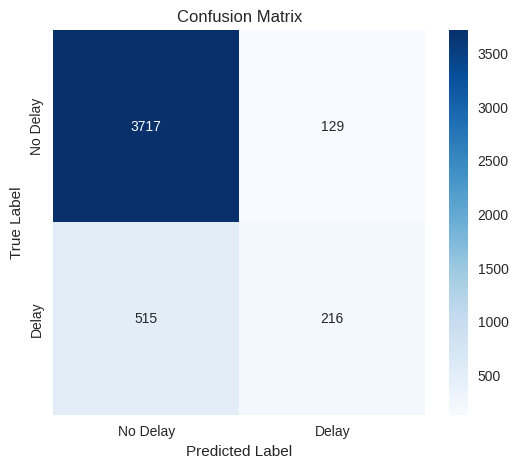

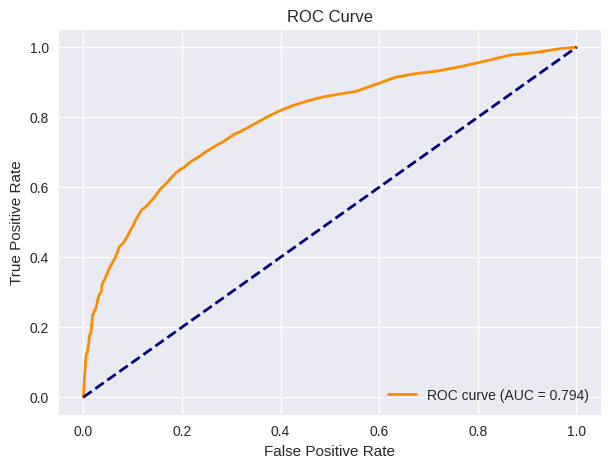


------------------------------------------------------------------------------------------------------------------------

SVC Evaluation

Test set score (accuracy): 0.501

              precision    recall  f1-score   support

          no      0.886     0.466     0.611      3846
         yes      0.196     0.685     0.305       731

    accuracy                          0.501      4577
   macro avg      0.541     0.576     0.458      4577
weighted avg      0.776     0.501     0.562      4577



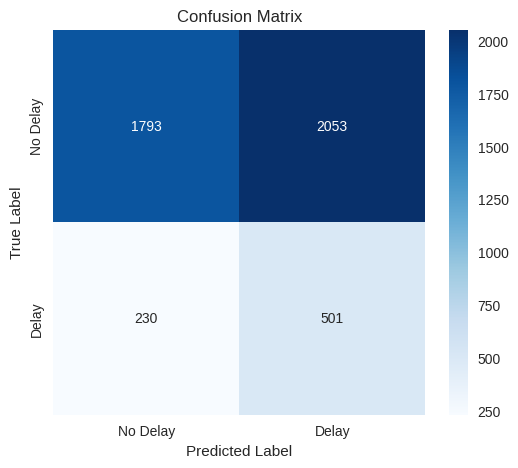

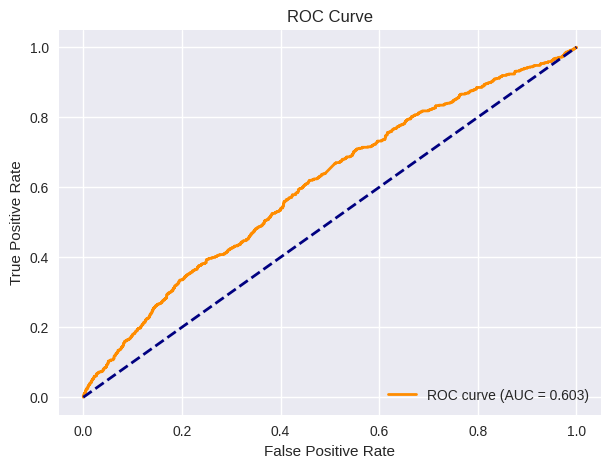


------------------------------------------------------------------------------------------------------------------------

DCT Evaluation

Test set score (accuracy): 0.811

              precision    recall  f1-score   support

          no      0.891     0.884     0.887      3846
         yes      0.413     0.428     0.420       731

    accuracy                          0.811      4577
   macro avg      0.652     0.656     0.654      4577
weighted avg      0.814     0.811     0.813      4577



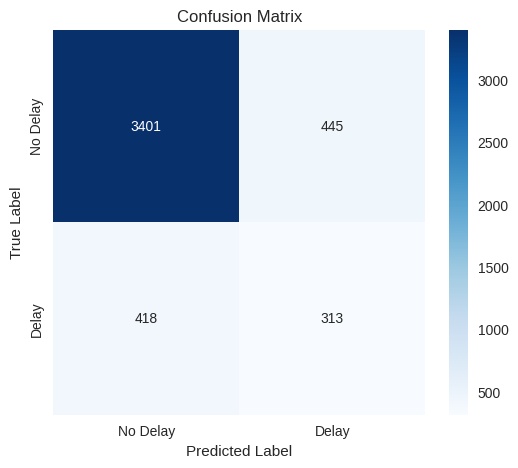

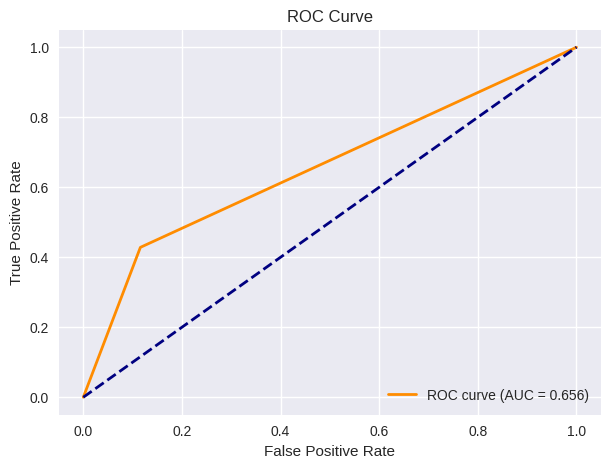


------------------------------------------------------------------------------------------------------------------------

NB Evaluation

Test set score (accuracy): 0.610

              precision    recall  f1-score   support

          no      0.872     0.628     0.730      3846
         yes      0.208     0.513     0.296       731

    accuracy                          0.610      4577
   macro avg      0.540     0.571     0.513      4577
weighted avg      0.766     0.610     0.661      4577



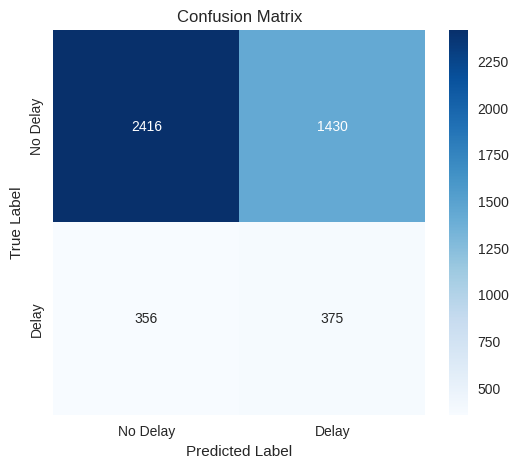

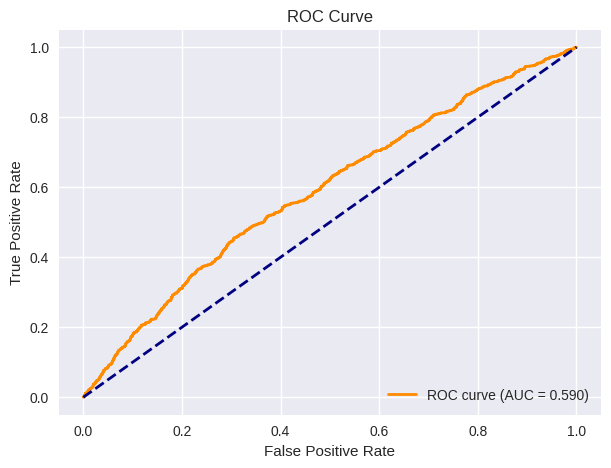


------------------------------------------------------------------------------------------------------------------------

KNN Evaluation

Test set score (accuracy): 0.670

              precision    recall  f1-score   support

          no      0.881     0.702     0.781      3846
         yes      0.242     0.499     0.326       731

    accuracy                          0.670      4577
   macro avg      0.561     0.601     0.553      4577
weighted avg      0.779     0.670     0.708      4577



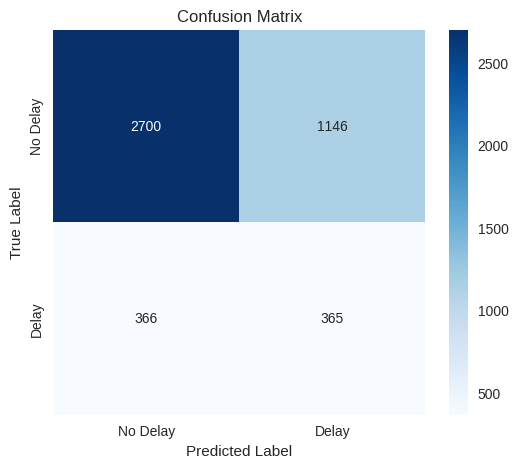

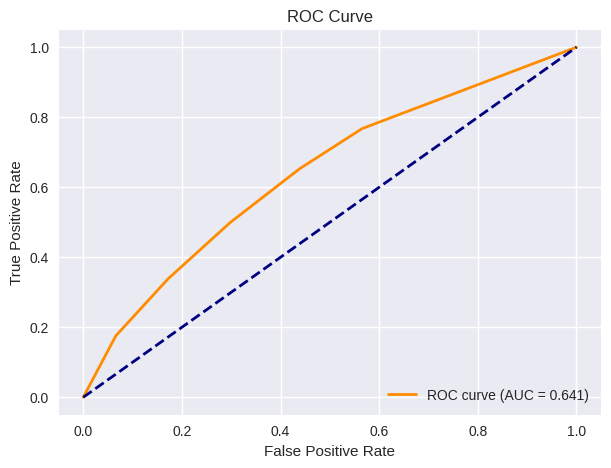


------------------------------------------------------------------------------------------------------------------------

BalancedRandomForest Evaluation

Test set score (accuracy): 0.861

              precision    recall  f1-score   support

          no      0.881     0.966     0.921      3846
         yes      0.632     0.311     0.417       731

    accuracy                          0.861      4577
   macro avg      0.756     0.638     0.669      4577
weighted avg      0.841     0.861     0.841      4577



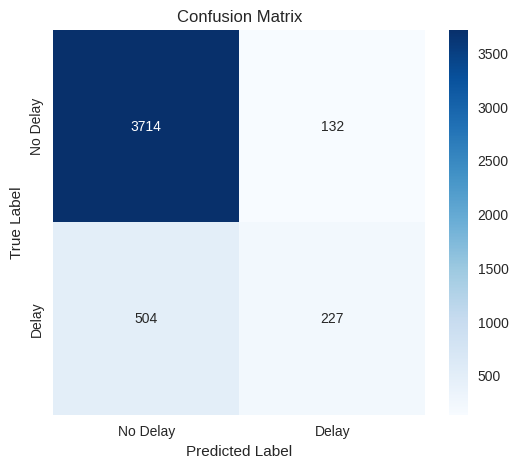

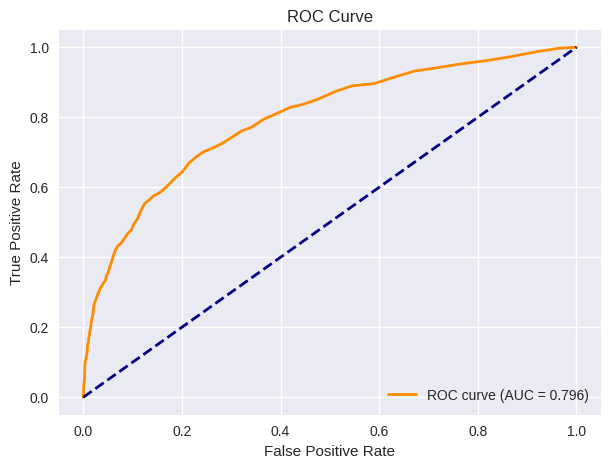


------------------------------------------------------------------------------------------------------------------------



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:27:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier Evaluation

Test set score (accuracy): 0.875

              precision    recall  f1-score   support

          no      0.898     0.960     0.928      3846
         yes      0.671     0.427     0.522       731

    accuracy                          0.875      4577
   macro avg      0.785     0.694     0.725      4577
weighted avg      0.862     0.875     0.863      4577



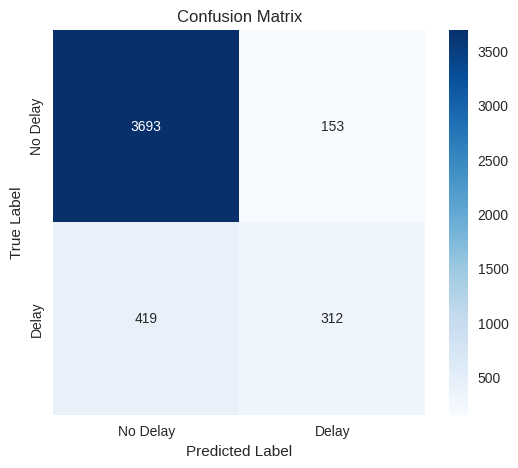

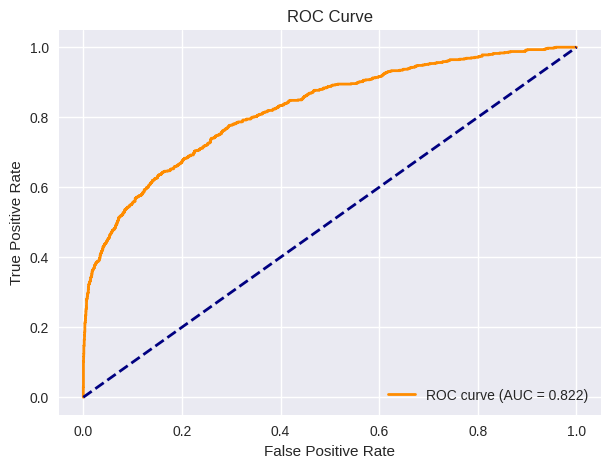


------------------------------------------------------------------------------------------------------------------------



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
import xgboost as xgb

# Assume class-balanced train/test data available: X_train_class, y_train_class, X_test_class, y_test_class
model_evaluation(RandomForestClassifier(class_weight='balanced'), X_train_class, y_train_class, X_test_class, y_test_class, 'RFC Evaluation')
model_evaluation(SVC(probability=True), X_train_class, y_train_class, X_test_class, y_test_class, 'SVC Evaluation')
model_evaluation(DecisionTreeClassifier(), X_train_class, y_train_class, X_test_class, y_test_class, 'DCT Evaluation')
model_evaluation(GaussianNB(), X_train_class, y_train_class, X_test_class, y_test_class, 'NB Evaluation')
model_evaluation(KNeighborsClassifier(), X_train_class, y_train_class, X_test_class, y_test_class, 'KNN Evaluation')
model_evaluation(BalancedRandomForestClassifier(random_state=42), X_train_class, y_train_class, X_test_class, y_test_class, 'BalancedRandomForest Evaluation')

class_counts = Counter(y_train_class)
scale_pos_weight = class_counts[0] / class_counts[1]
model_evaluation(xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss', random_state=42), X_train_class, y_train_class, X_test_class, y_test_class, 'XGBClassifier Evaluation')


In [ ]:
#Convert result list to dataframe
results_df = pd.DataFrame(results_list)

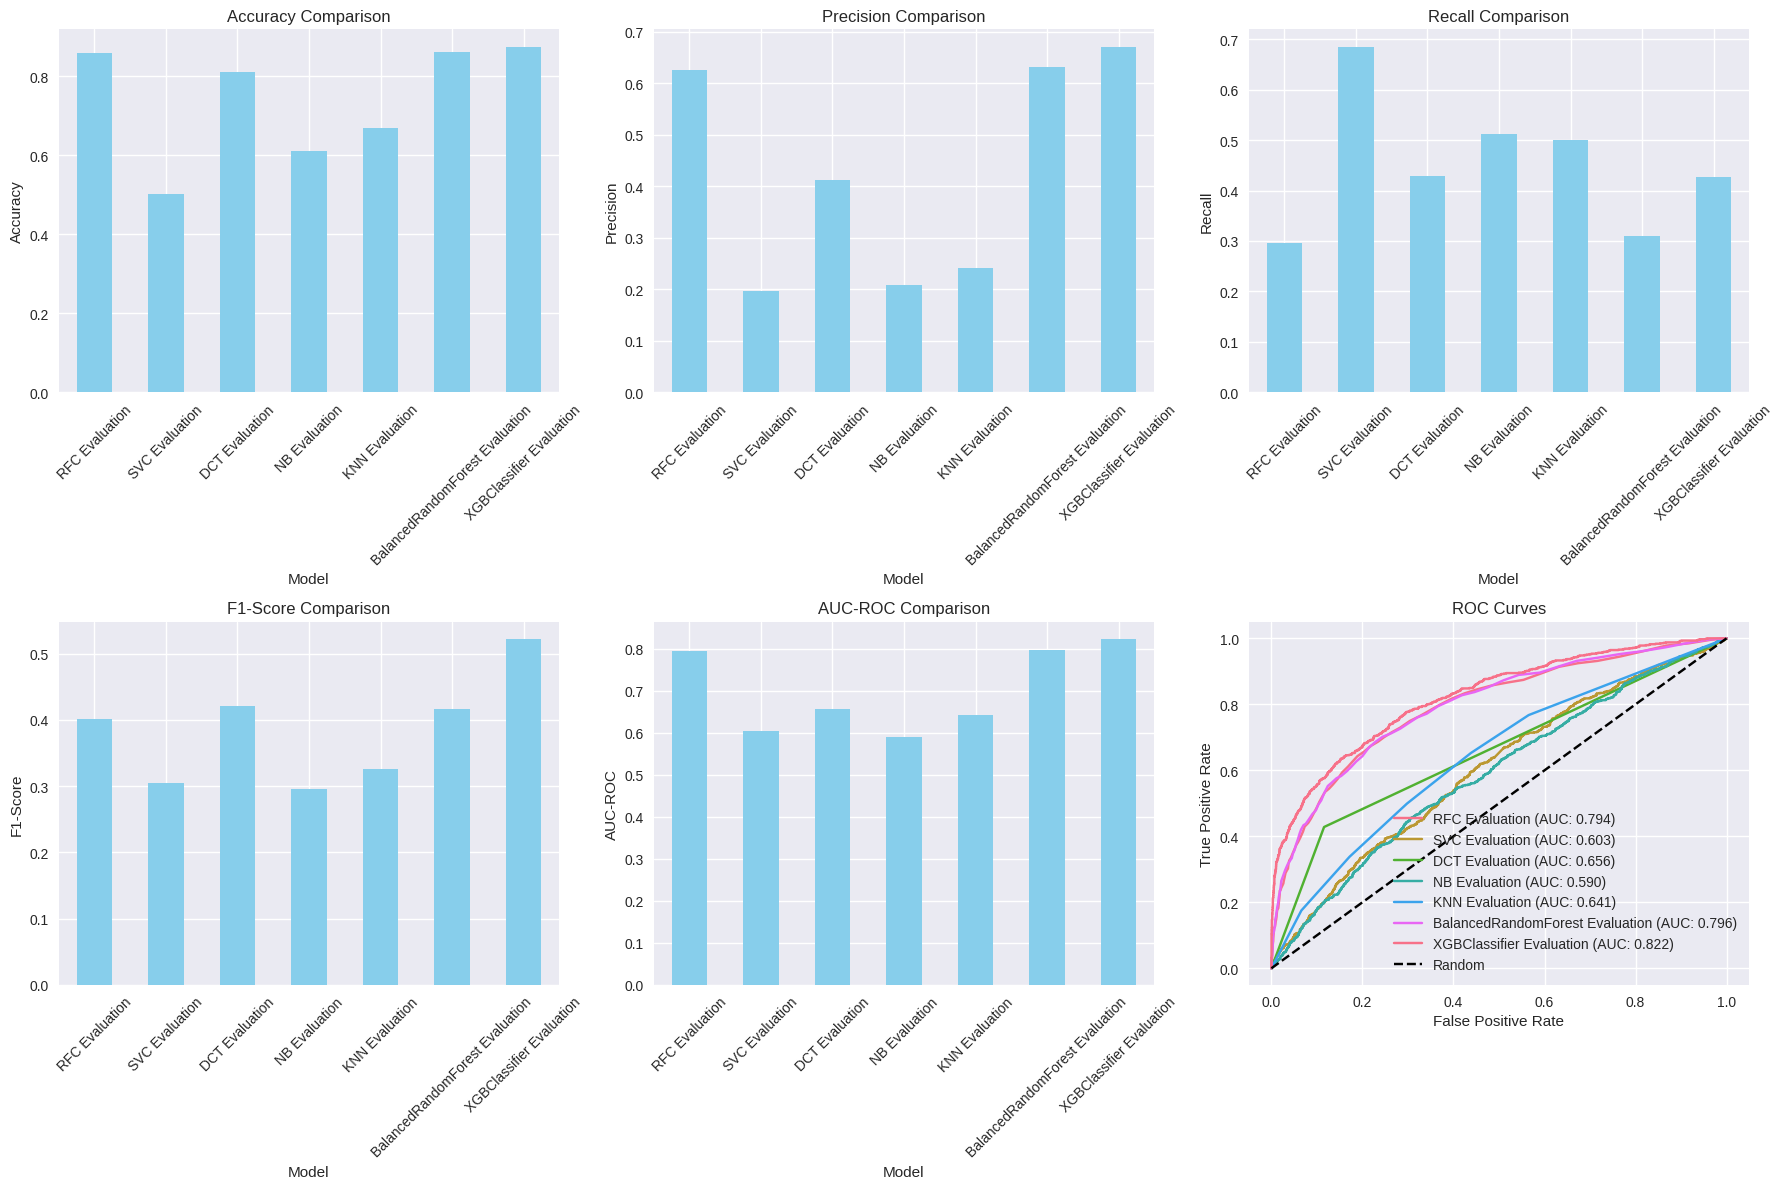

In [ ]:
# Plot model comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
for i, metric in enumerate(metrics):
    ax = axes[i//3, i%3]
    results_df.plot(x='Model', y=metric, kind='bar', ax=ax, legend=False, color='skyblue')
    ax.set_title(f'{metric} Comparison')
    ax.set_xticklabels(results_df['Model'], rotation=45)
    ax.set_ylabel(metric)

ax = axes[1, 2]
for name, results in model_results.items():
    fpr, tpr, _ = roc_curve(y_test_class, results['y_pred_proba'])
    ax.plot(fpr, tpr, label=f"{name} (AUC: {results['auc_roc']:.3f})")

ax.plot([0, 1], [0, 1], 'k--', label='Random')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#Select best model based on F1-Score
best_model_name = results_df.loc[results_df['F1-Score'].idxmax(), 'Model']
best_model = model_results[best_model_name]['model']
print(f"Best model selected: {best_model_name}")
print(f"F1-Score: {model_results[best_model_name]['f1']:.4f}")

Best model selected: XGBClassifier Evaluation
F1-Score: 0.5217


# SHAP

 98%|===================| 4469/4577 [00:25<00:00]       

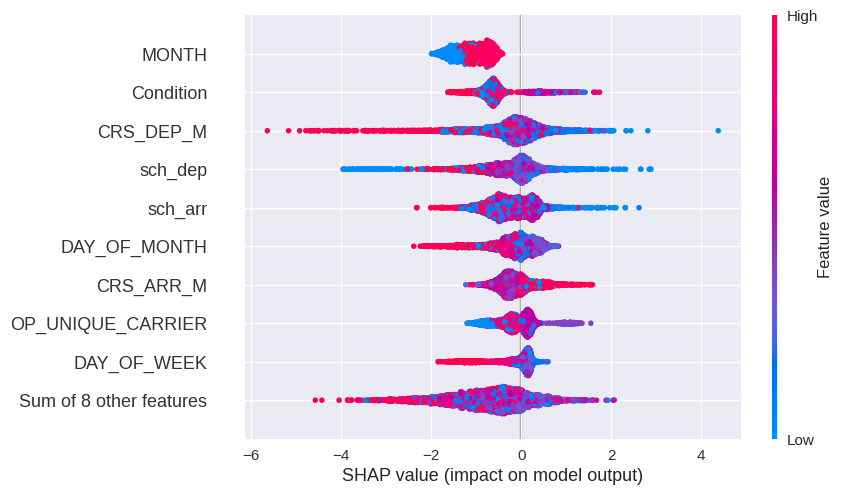

In [ ]:
import shap

# Fit SHAP explainer on the best model
explainer = shap.Explainer(best_model, X_train_class)
shap_values = explainer(X_test_class)

# Summary plot (global feature importance)
shap.plots.beeswarm(shap_values)

# Force plot (for individual prediction)
shap.plots.force(shap_values[0])
